# Big Data Analytics Project FS21 - Time Series Analysis and Forecasting of Coal Prices in South Africa

Submitted by - 

Barış Özakar - 20743365

Emine Didem Durukan - 20745733

Kartikey Sharma - 20744595

Pratyush Singh - 19762988

Tanmay Chimurkar - 20745907

# Introduction

#Data of Coal Prices for South Africa from OECD Website

Attributes:

Coal.Australia - Coal Price of Australia ($/tonne)

Coal.SA - Coal Price of South Africa ($/tonne)

Crude Oil - $/Barrel

Natural Gas - $ / million BTUs

Gold - $ / ounce

Silver - $ / ounce

Copper - $ / Tonne

Iron Ore - $ / Dry Metric Tonne

Commodity Index: A commodity index is an investment vehicle that tracks the price and the return on investment of a basket of commodities. The value of these indexes fluctuates based on their underlying commodities

Similarly—> Metal index, Non Fuel index, and Crude oil index 

BCI: Business Confidence Index
This business confidence indicator provides information on future developments, based upon opinion surveys on developments in production, orders and stocks of finished goods in the industry sector. It can be used to monitor output growth and to anticipate turning points in economic activity. Numbers above 100 suggest an increased confidence in near future business performance, and numbers below 100 indicate pessimism towards future performance.

CCI: Consumer Confidence Index
This consumer confidence indicator provides an indication of future developments of households’ consumption and saving, based upon answers regarding their expected financial situation, their sentiment about the general economic situation, unemployment and capability of savings. An indicator above 100 signals a boost in the consumers’ confidence towards the future economic situation, as a consequence of which they are less prone to save, and more inclined to spend money on major purchases in the next 12 months. Values below 100 indicate a pessimistic attitude towards future developments in the economy, possibly resulting in a tendency to save more and consume less.

CLI: Composite Leading Indicator
The composite leading indicator (CLI) is designed to provide early signals of turning points in business cycles showing fluctuation of the economic activity around its long term potential level. CLIs show short-term economic movements in qualitative rather than quantitative terms



# Research Questions

Questions to be answered:

    1) The trend shows the general tendency of the data to increase or decrease during a long period of time. Is there 
    a significant trend? 

    2) Seasonality exists when a series exhibits regular fluctuations based on the season. Is there seasonality in our 
    series?

    3) Cyclic behaviour occurs when the data exhibit rises and falls that are not of a fixed frequency. These fluctuations 
    are usually due to economic conditions, and are often related to the “business cycle”. The duration of these 
    fluctuations is usually at least 2 years. Is there evidence of the presence of cycles in our data? 

    4) Outliers in time series data are values that significantly differ from the patterns and trends of the other values 
    in the time series. Are there any outliers in the data that need to be explained by those with expert knowledge? 

    5) How strong are the relationships among the variables available for analysis?
    
    6) We would like to forecast future prices of Coal.SA, which model would be best in handling this prediction? How can
    we compare between these different models?



#  Imports

In [32]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

import datetime
import statsmodels.api as sm
from pylab import rcParams
from datetime import datetime
#from statsmodels.tsa.seasonal import STL
from statsmodels.tsa.stattools import acf, pacf
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf,month_plot,quarter_plot

rcParams['figure.figsize'] = 18, 10


A quick inspection at data reveal our data is the first day of every month for every year between 1992-2020. We forecast the Coal.SA series

### If using Colab

In [33]:
# step 1- Mount your Google Drive to Collaboratory

# from google.colab import drive 
# drive.mount('/content/gdrive')
# df=pd.read_csv('/content/gdrive/MyDrive/Colab Notebooks/Big Data Analytics/coal-25082020.csv')
# df.Date = pd.to_datetime(df.Date, dayfirst=True)
# df = df.sort_values(by='Date')
# df = df.set_index('Date')
# df.index=pd.to_datetime(df.index.strftime("%Y-%d-%m"))

## Data Preparation

In [34]:
df = pd.read_csv("coal-25082020.csv")
df.Date = pd.to_datetime(df.Date, dayfirst=True)
df = df.sort_values(by='Date')
df = df.set_index('Date')
df.index=pd.to_datetime(df.index.strftime("%Y-%d-%m"))

## Data Cleaning

In [35]:
nan_values_array = []
for column in df:
     nan_values_array.append(df[column].isnull().sum())

In [36]:
column_names = list(df.columns.values)
data = {'Feature':column_names,'Number of NaN values':nan_values_array}
nan_values = pd.DataFrame(data)
print(nan_values)

                Feature  Number of NaN values
0        Coal.Australia                     0
1               Coal.SA                     0
2              CrudeOil                     0
3            Fuel.Index                     1
4            NaturalGas                     0
5   Coal.Producer.Index                     0
6                  Gold                     1
7                Silver                     0
8                Copper                     0
9               IronOre                     1
10       CrudeOil.Index                     0
11          Metal.Index                     0
12        NonFuel.Index                     0
13      Commodity.Index                     0
14                  CLI                     1
15                  CCI                     0
16                  BCI                     0


Our data looks pretty clean. We dealed with missing data using "Mean Imputation" method. We will fill the NaN values with the mean of the corresponding attributes. We need to deal with those NaN values even though they are not that much, because in feature selection steps some methods needs data to be NaN value free.

In [37]:
df['Fuel.Index'].fillna(value=df['Fuel.Index'].mean(),inplace=True)
df['Gold'].fillna(value=df['Gold'].mean(),inplace=True)
df['IronOre'].fillna(value=df['IronOre'].mean(),inplace=True)
df['CLI'].fillna(value=df['CLI'].mean(),inplace=True)
df.isnull().values.any()

False

False means that there are no Null values

In [38]:
## Feature Selection and Correlation


First we will analyze the correlation between features by correlation matrix and we will visualize it with heatmap. We will compare both Spearman and Pearson correlation coefficients.

### Pearson Correlation Coefficient

It is a measure of linear correlation between two sets of data. It is the covariance of two variables, divided by the product of their standard deviations; thus it is essentially a normalised measurement of the covariance, such that the result always has a value between −1 and 1. 

In [39]:
#Default of this method is 'Pearson'
df.corr()

Coal.Australia   Coal.SA  CrudeOil  Fuel.Index  \
Coal.Australia             1.000000  0.987597  0.850179    0.851378   
Coal.SA                    0.987597  1.000000  0.871322    0.873123   
CrudeOil                   0.850179  0.871322  1.000000    0.995256   
Fuel.Index                 0.851378  0.873123  0.995256    1.000000   
NaturalGas                 0.255521  0.290419  0.406549    0.466557   
Coal.Producer.Index        0.810126  0.823938  0.796077    0.774840   
Gold                       0.783050  0.801117  0.771491    0.743783   
Silver                     0.810518  0.829874  0.861501    0.838364   
Copper                     0.864974  0.874786  0.915172    0.905553   
IronOre                    0.852453  0.862946  0.904424    0.902277   
CrudeOil.Index             0.847381  0.870686  0.996619    0.990689   
Metal.Index                0.854603  0.865686  0.909210    0.908074   
NonFuel.Index              0.901460  0.910450  0.924016    0.913937   
Commodity.Index            0.887339  0.907782  0.987910    0.982795   
CLI                        0.082951  0.091018  0.172163    0.167970   
CCI                       -0.542247 -0.539615 -0.523912   -0.531671   
BCI                        0.177860  0.180988  0.200040    0.194572   

                     NaturalGas  Coal.Producer.Index      Gold    Silver  \
Coal.Australia         0.255521             0.810126  0.783050  0.810518   
Coal.SA                0.290419             0.823938  0.801117  0.829874   
CrudeOil               0.406549             0.796077  0.771491  0.861501   
Fuel.Index             0.466557             0.774840  0.743783  0.838364   
NaturalGas             1.000000             0.012193 -0.057628  0.062815   
Coal.Producer.Index    0.012193             1.000000  0.967557  0.879425   
Gold                  -0.057628             0.967557  1.000000  0.917025   
Silver                 0.062815             0.879425  0.917025  1.000000   
Copper                 0.271090             0.854071  0.850084  0.887863   
IronOre                0.358885             0.721125  0.735615  0.833503   
CrudeOil.Index         0.393989             0.819444  0.791567  0.862686   
Metal.Index            0.387791             0.767045  0.764590  0.836922   
NonFuel.Index          0.230196             0.866988  0.866443  0.922447   
Commodity.Index        0.362033             0.855626  0.836704  0.905437   
CLI                    0.179731             0.010621  0.044130  0.105823   
CCI                   -0.164417            -0.492948 -0.490846 -0.515595   
BCI                    0.146136             0.069715  0.075308  0.153023   

                       Copper   IronOre  CrudeOil.Index  Metal.Index  \
Coal.Australia       0.864974  0.852453        0.847381     0.854603   
Coal.SA              0.874786  0.862946        0.870686     0.865686   
CrudeOil             0.915172  0.904424        0.996619     0.909210   
Fuel.Index           0.905553  0.902277        0.990689     0.908074   
NaturalGas           0.271090  0.358885        0.393989     0.387791   
Coal.Producer.Index  0.854071  0.721125        0.819444     0.767045   
Gold                 0.850084  0.735615        0.791567     0.764590   
Silver               0.887863  0.833503        0.862686     0.836922   
Copper               1.000000  0.886565        0.916779     0.980363   
IronOre              0.886565  1.000000        0.889031     0.914708   
CrudeOil.Index       0.916779  0.889031        1.000000     0.904568   
Metal.Index          0.980363  0.914708        0.904568     1.000000   
NonFuel.Index        0.964621  0.916057        0.916127     0.944256   
Commodity.Index      0.950226  0.918652        0.986068     0.936344   
CLI                  0.282215  0.166951        0.181964     0.339946   
CCI                 -0.458691 -0.583230       -0.496111    -0.430284   
BCI                  0.274979  0.123521        0.212045     0.305553   

                     NonFuel.Index  Commodity.Index       CLI       CCI  \
C

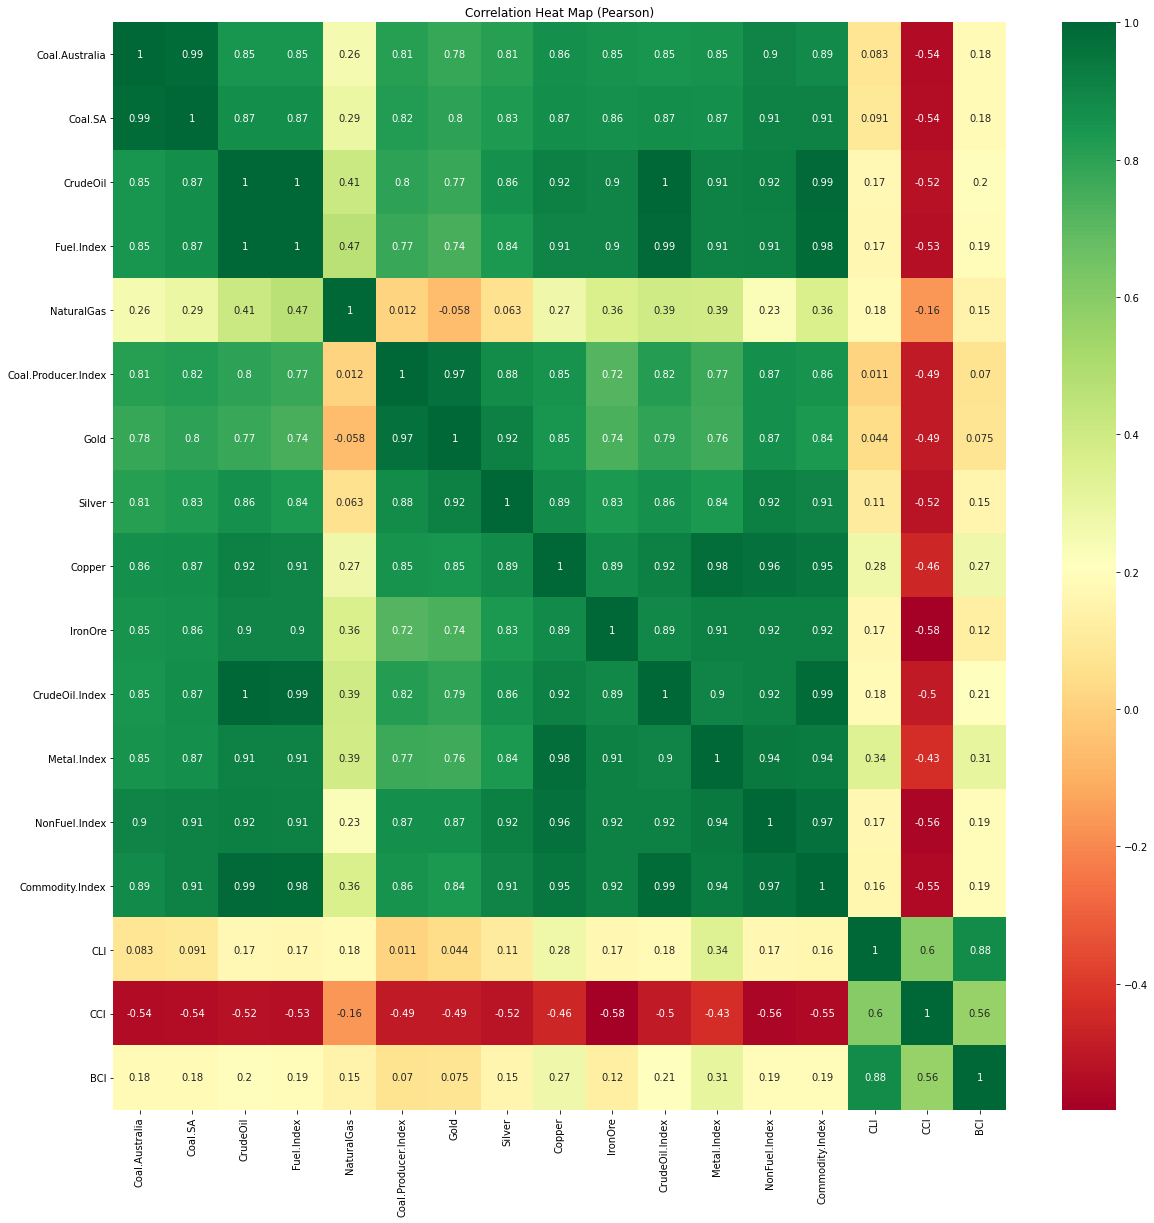

In [40]:
corrmat = df.corr()
top_corr_features = corrmat.index
plt.figure(figsize=(20,20))
#plot heat map
g=sns.heatmap(df[top_corr_features].corr(),annot=True,cmap="RdYlGn").set_title("Correlation Heat Map (Pearson)")

### Spearman Correlation Coefficient

It is a nonparametric measure of rank correlation (statistical dependence between the rankings of two variables). It assesses how well the relationship between two variables can be described using a monotonic function. 

In [41]:
df.corr(method='spearman')

Coal.Australia   Coal.SA  CrudeOil  Fuel.Index  \
Coal.Australia             1.000000  0.973604  0.825700    0.820585   
Coal.SA                    0.973604  1.000000  0.855360    0.850857   
CrudeOil                   0.825700  0.855360  1.000000    0.992517   
Fuel.Index                 0.820585  0.850857  0.992517    1.000000   
NaturalGas                 0.292782  0.366861  0.585672    0.623822   
Coal.Producer.Index        0.852715  0.858414  0.835841    0.820430   
Gold                       0.867391  0.867964  0.783084    0.767719   
Silver                     0.849249  0.857961  0.826411    0.813453   
Copper                     0.908248  0.893044  0.879207    0.872256   
IronOre                    0.863539  0.865173  0.899158    0.894594   
CrudeOil.Index             0.824017  0.855584  0.997040    0.987847   
Metal.Index                0.886046  0.885854  0.897172    0.892057   
NonFuel.Index              0.917062  0.904266  0.851992    0.846298   
Commodity.Index            0.873373  0.905722  0.977501    0.972673   
CLI                        0.197288  0.195795  0.255747    0.253454   
CCI                       -0.477537 -0.466701 -0.480276   -0.484887   
BCI                        0.276444  0.286296  0.272766    0.269419   

                     NaturalGas  Coal.Producer.Index      Gold    Silver  \
Coal.Australia         0.292782             0.852715  0.867391  0.849249   
Coal.SA                0.366861             0.858414  0.867964  0.857961   
CrudeOil               0.585672             0.835841  0.783084  0.826411   
Fuel.Index             0.623822             0.820430  0.767719  0.813453   
NaturalGas             1.000000             0.233309  0.148604  0.258498   
Coal.Producer.Index    0.233309             1.000000  0.931889  0.861441   
Gold                   0.148604             0.931889  1.000000  0.918048   
Silver                 0.258498             0.861441  0.918048  1.000000   
Copper                 0.354649             0.834572  0.873463  0.872711   
IronOre                0.461426             0.837785  0.811249  0.825872   
CrudeOil.Index         0.566852             0.844469  0.783456  0.826732   
Metal.Index            0.449583             0.790692  0.826023  0.857810   
NonFuel.Index          0.288322             0.852627  0.899988  0.911157   
Commodity.Index        0.541609             0.853923  0.842226  0.872452   
CLI                    0.266691             0.093087  0.138960  0.275775   
CCI                   -0.137696            -0.540761 -0.528130 -0.411287   
BCI                    0.271374             0.184543  0.185918  0.284948   

                       Copper   IronOre  CrudeOil.Index  Metal.Index  \
Coal.Australia       0.908248  0.863539        0.824017     0.886046   
Coal.SA              0.893044  0.865173        0.855584     0.885854   
CrudeOil             0.879207  0.899158        0.997040     0.897172   
Fuel.Index           0.872256  0.894594        0.987847     0.892057   
NaturalGas           0.354649  0.461426        0.566852     0.449583   
Coal.Producer.Index  0.834572  0.837785        0.844469     0.790692   
Gold                 0.873463  0.811249        0.783456     0.826023   
Silver               0.872711  0.825872        0.826732     0.857810   
Copper               1.000000  0.877198        0.869944     0.978305   
IronOre              0.877198  1.000000        0.896075     0.888762   
CrudeOil.Index       0.869944  0.896075        1.000000     0.885910   
Metal.Index          0.978305  0.888762        0.885910     1.000000   
NonFuel.Index        0.958723  0.875642        0.842783     0.935736   
Commodity.Index      0.921424  0.903172        0.971780     0.934856   
CLI                  0.336280  0.166245        0.258012     0.413420   
CCI                 -0.465062 -0.558628       -0.466452    -0.382067   
BCI                  0.352826  0.168960        0.271480     0.413140   

                     NonFuel.Index  Commodity.Index       CLI       CCI  \
C

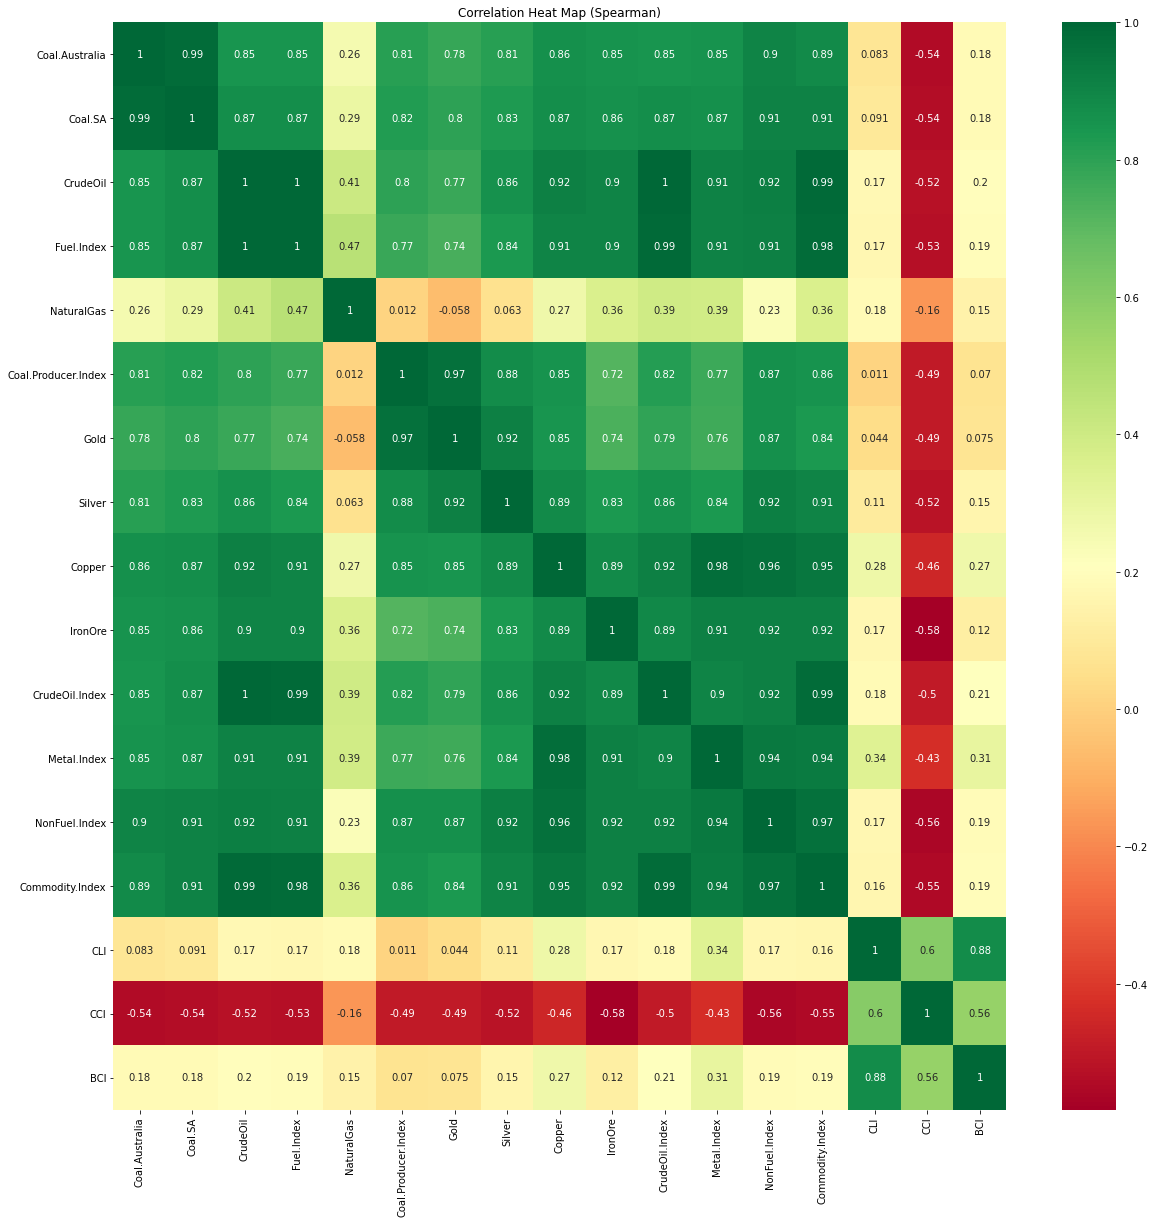

In [42]:
corrmat_spearman = df.corr(method='spearman')
top_corr_features = corrmat_spearman.index
plt.figure(figsize=(20,20))
#plot heat map
g=sns.heatmap(df[top_corr_features].corr(),annot=True,cmap="RdYlGn").set_title("Correlation Heat Map (Spearman)")

As we can see, there is no big difference that needs to be considered between two different correlation coefficients. Therefore, we will continue with our feature selection step using Pearson Correlation Coefficient.

## Feature Selection

We will look at the features that have higher correlation than 0.5 with our target variable.

In [43]:
#Correlation with output variable
cor_target = abs(corrmat["Coal.SA"])
#Selecting highly correlated features
relevant_features = cor_target[cor_target>0.5]
print(relevant_features)

Coal.Australia         0.987597
Coal.SA                1.000000
CrudeOil               0.871322
Fuel.Index             0.873123
Coal.Producer.Index    0.823938
Gold                   0.801117
Silver                 0.829874
Copper                 0.874786
IronOre                0.862946
CrudeOil.Index         0.870686
Metal.Index            0.865686
NonFuel.Index          0.910450
Commodity.Index        0.907782
CCI                    0.539615
Name: Coal.SA, dtype: float64


Now, we will check the correlation between these variables. The reason why we need check the correlation between the attributes besides our target attribute, is to find the unnecessary ones. These unnecessary attributes will cause us problems such as overfitting during the machine learning step. Thus, we have to detect them and remove them from our data

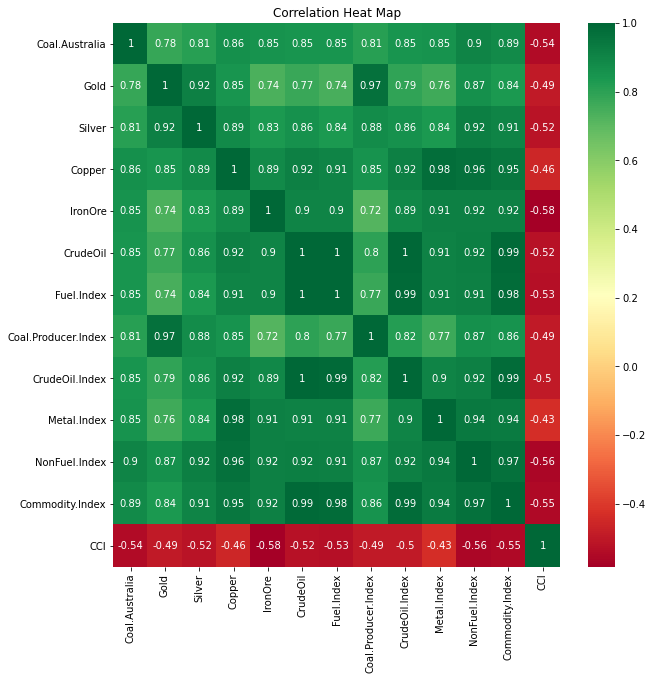

In [44]:
rf_df = df[['Coal.Australia', 'Gold','Silver','Copper','IronOre','CrudeOil','Fuel.Index','Coal.Producer.Index','CrudeOil.Index','Metal.Index','NonFuel.Index','Commodity.Index','CCI']]
fig, ax = plt.subplots(figsize=(10,10))
h=sns.heatmap(rf_df.corr(),annot=True,cmap="RdYlGn",ax=ax).set_title("Correlation Heat Map")

## Notes about correlation

From the above correlation matrix, we get the following results
    * Gold and Copper has high correlation
    * Gold and Coal.Producer.Index has high correlation
    * Silver and Gold has high Correlation
    * Silver and NonFuel.Index has high correlation also there is high correlation with Commodity.Index
    * Copper and CrudeOil,Fuel.Index,Metal.Index,NonFuel.Index,Commodity.Index and CrudeOil.Index has    high correlation
    * IronOre and Fuel.Index,CrudeOil,Metal.Index,NonFuel.Index,Commodity.Index has high correlation
    * CrudeOil and Metal.Index,NonFuel.Index,Commodity.Index has high correlation
    * CrudeOil.Index and Fuel.Index,NonFuel.Index,Metal.Index has high correlation
    * Metal.Index has high correlation with Fuel.Index,NonFuel.Index,Commodity.Index
    * NonFuel.Index has high correlation with Fuel.Index,Commodity.Index
    
 We will check these variables' correlation with our target variable and then drop the  attribute that has lowest correlation with our target. If two attribute has a high correlation between them, this means that they almost have linear relationship. So, we can think of them as a single variable basically. Therefore, we will see which one has the highest correlation with our target variable and remove the other one.

Text(0.5, 1.0, 'Metal.Index vs. Copper')

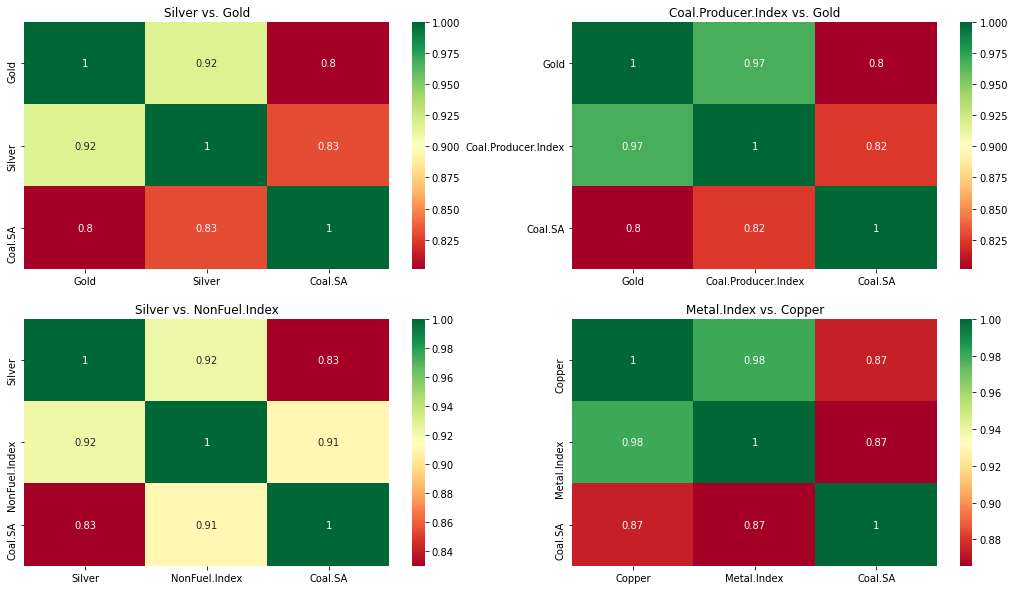

In [45]:
fig2,ax2 = plt.subplots(2,2)
sns.heatmap(df[['Gold','Silver','Coal.SA']].corr(),ax=ax2[0][0],annot=True,cmap="RdYlGn").set_title('Silver vs. Gold')
sns.heatmap(df[['Gold','Coal.Producer.Index','Coal.SA']].corr(),ax=ax2[0][1],annot=True,cmap="RdYlGn").set_title('Coal.Producer.Index vs. Gold')
sns.heatmap(df[['Silver','NonFuel.Index','Coal.SA']].corr(),ax=ax2[1][0],annot=True,cmap="RdYlGn").set_title('Silver vs. NonFuel.Index')
sns.heatmap(df[['Copper','Metal.Index','Coal.SA']].corr(),ax=ax2[1][1],annot=True,cmap="RdYlGn").set_title('Metal.Index vs. Copper')


We examined the attributes that has high correlation between them and observed their relationship with our target variable. After analysing the heatmaps above, we decided to drop "Gold, and Silver" attributes.

Text(0.5, 1.0, 'Fuel.Index vs. CrudeOil')

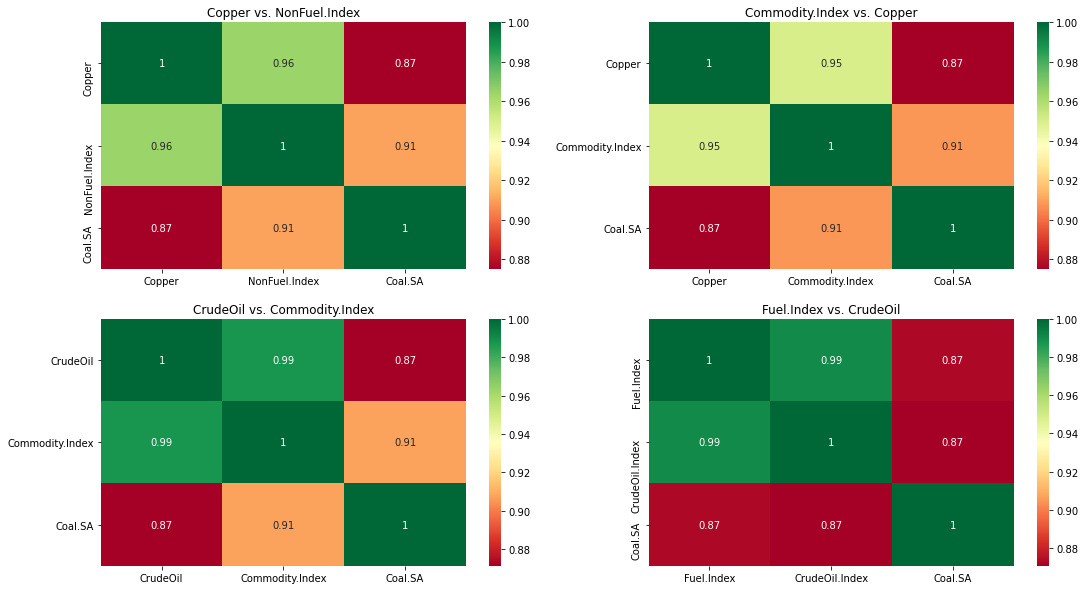

In [46]:
fig3,ax3 = plt.subplots(2,2)
sns.heatmap(df[['Copper','NonFuel.Index','Coal.SA']].corr(),ax=ax3[0][0],annot=True,cmap="RdYlGn").set_title('Copper vs. NonFuel.Index')
sns.heatmap(df[['Copper','Commodity.Index','Coal.SA']].corr(),ax=ax3[0][1],annot=True,cmap="RdYlGn").set_title('Commodity.Index vs. Copper')
sns.heatmap(df[['CrudeOil','Commodity.Index','Coal.SA']].corr(),ax=ax3[1][0],annot=True,cmap="RdYlGn").set_title('CrudeOil vs. Commodity.Index')
sns.heatmap(df[['Fuel.Index','CrudeOil.Index','Coal.SA']].corr(),ax=ax3[1][1],annot=True,cmap="RdYlGn").set_title('Fuel.Index vs. CrudeOil') 

After analysing the heatmaps above, we decided to drop "Gold, and Silver" attributes. We decide to take the attribute "Non-Fuel" and drop "Copper".

Text(0.5, 1.0, 'CrudeOil.Index vs. Commodity.Index')

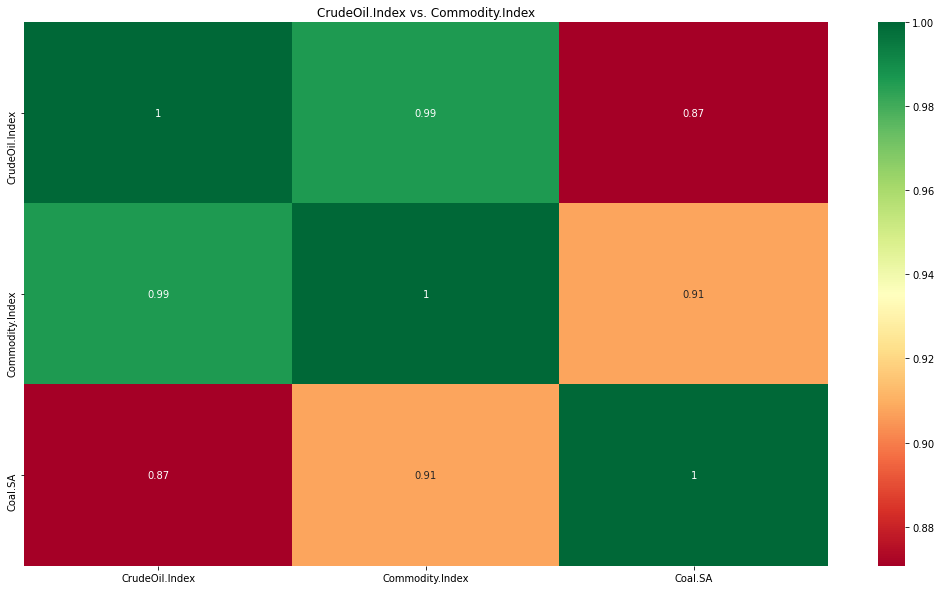

In [47]:
sns.heatmap(df[['CrudeOil.Index','Commodity.Index','Coal.SA']].corr(),annot=True,cmap="RdYlGn").set_title("CrudeOil.Index vs. Commodity.Index") 


We will take all the variables has high correlation with our target "Corel.SA" and drop the others with the ones we decide to eliminate after analysing the heatmaps above.


In [48]:
df.drop(['Gold','Silver','Copper','CrudeOil','CLI','BCI','NaturalGas'], axis=1,inplace=True)
df.head()
df.shape

(343, 10)

In [49]:
df.columns

Index(['Coal.Australia', 'Coal.SA', 'Fuel.Index', 'Coal.Producer.Index',
       'IronOre', 'CrudeOil.Index', 'Metal.Index', 'NonFuel.Index',
       'Commodity.Index', 'CCI'],
      dtype='object')

# Exploratory Data Analysis

### Time Series Plot

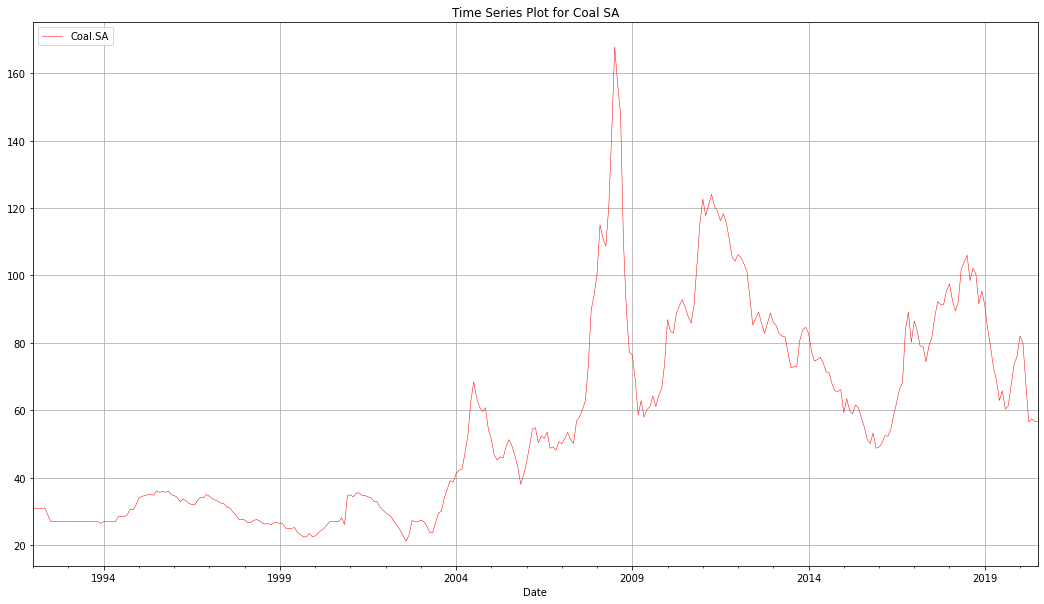

In [50]:
df["Coal.SA"].plot(linewidth=0.5, color='red')
plt.legend(df[["Coal.SA"]], loc ="upper left") 
plt.title("Time Series Plot for Coal SA")
plt.show()

Time series plot reveals that the coal prices have generally increased over time. There is a clear sign of trend. The variance seems to be low from 1992-2002 and is higher generally higher 2004 onwards. This indicates that in order to account for this increase in variance, we may need to take the log of the series. There are no cycles in the series. 
   

## Trend

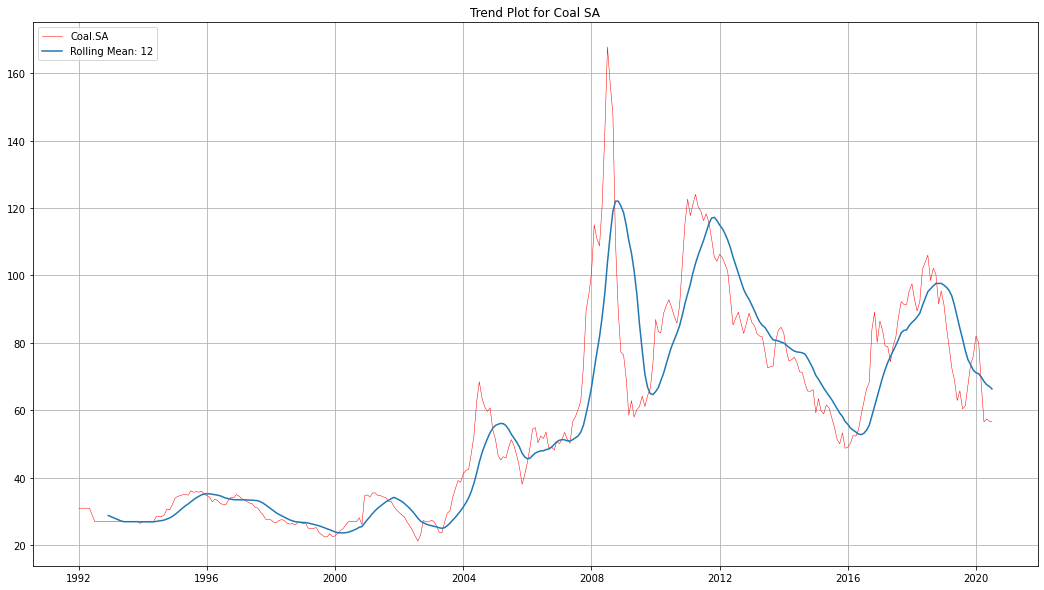

In [51]:
plt.plot(df.index, df["Coal.SA"], linewidth=0.5, color='red')
plt.plot(pd.Series.rolling(df["Coal.SA"], 12).mean())
plt.legend(["Coal.SA", "Rolling Mean: 12"], loc ="upper left") 
plt.title("Trend Plot for Coal SA")
plt.show()

The simple moving average is the unweighted mean of the previous M data points. Here M=12 to account for the annual effect.
We can see that:
1) Coal SA series has a trend. It goes up until around 2008 and then the trend changes direction and starting from 2008. Since there is trend, the time series is not stationary.

Because of the trend, we may say that the data is not stationary but such a hypothesis needs to be checked using the following methods: (ACF plot of the data as well as the Adjusted Dickey Fuller Test)

## Seasonality

In [52]:
df['Year'] = pd.DatetimeIndex(df.index).year
df['Month'] = pd.DatetimeIndex(df.index).month

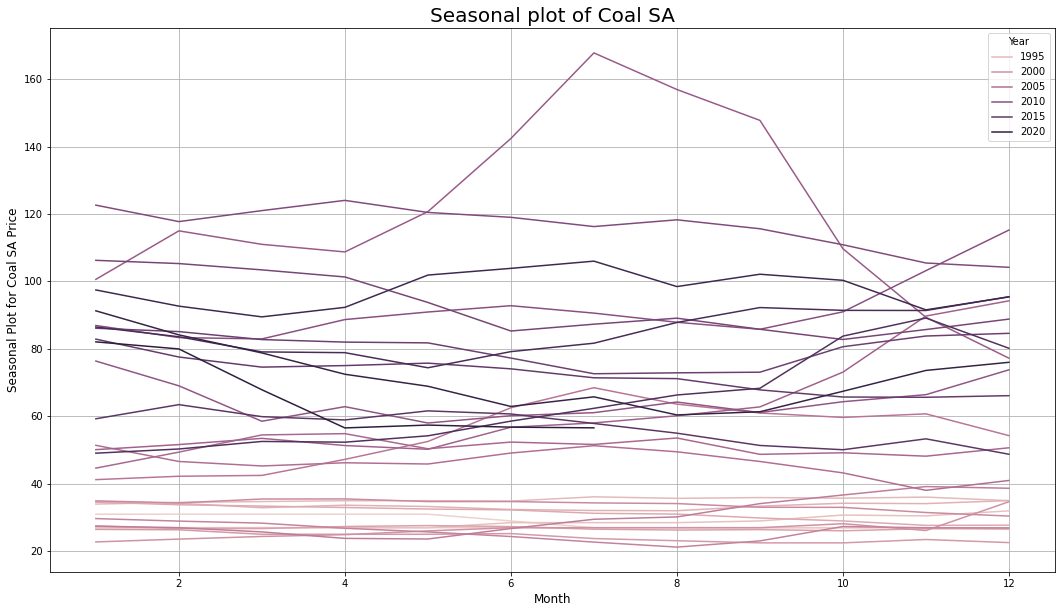

In [53]:
fig, ax = plt.subplots()
ax.set_xlabel('Month', fontsize = 12)
ax.set_ylabel('Seasonal Plot for Coal SA Price', fontsize = 12);
ax.set_title('Seasonal plot of Coal SA', fontsize = 20, loc='center');
sns.lineplot(x=df['Month'], y=df["Coal.SA"], hue=df['Year']);

Looking at the seasonal plot, there does not seem to be a significant increase or decrease from one month to another over the years, although in the obvious outlier, there seems to be an increase from April to July. However, the general picture reflects no "obvious" seasonality.

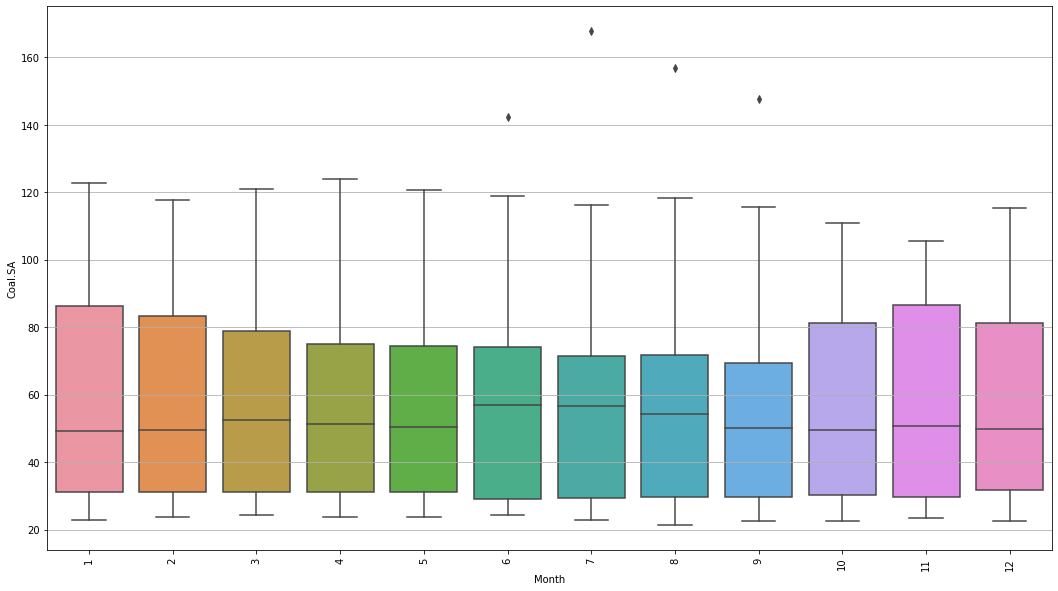

In [54]:
ax = sns.boxplot(data=df, x='Month', y='Coal.SA')
ax.set_xticklabels(ax.get_xticklabels(),rotation=90);

As it can be seen from the seasonal boxplot, the overall level of all months are around the same, therefore we can again conclude there is no obvious seasonality. We also realize there are some outliers, looking back at the data for those levels, it indicates that the outliers are coming from the year 2008-2009.

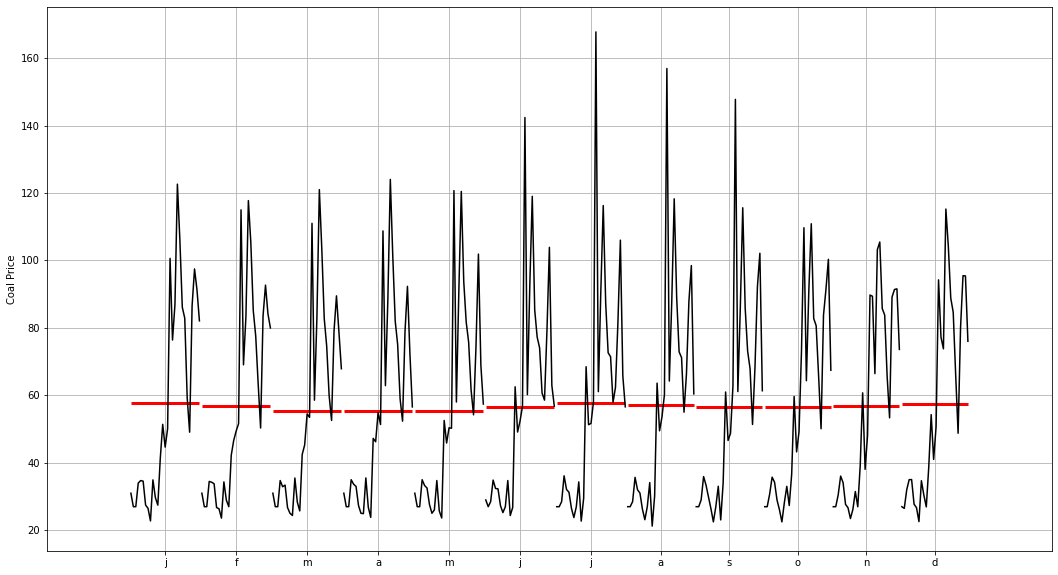

In [55]:
month_plot(df["Coal.SA"],ylabel='Coal Price');

As it can be seen from the seasonal subseries plot, the overall level of all months are around the same, therefore we can again conclude there is no obvious seasonality.

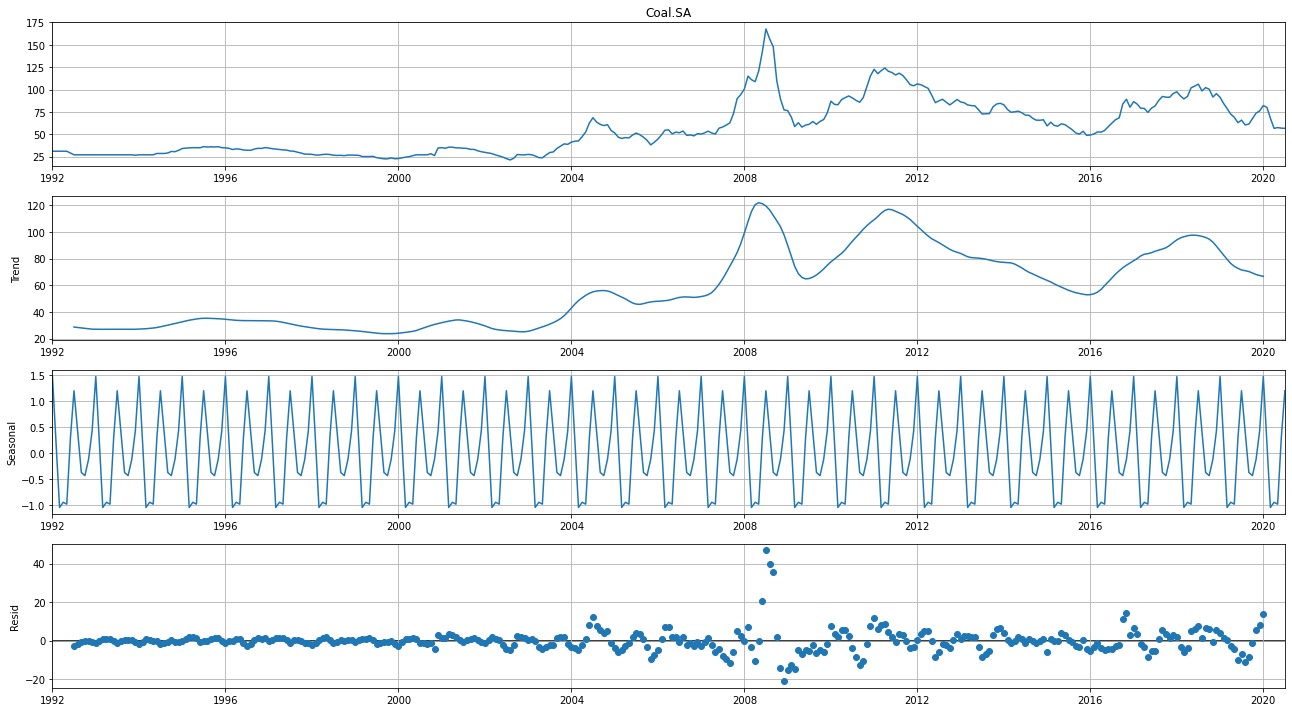

In [56]:
cls_decomposition = sm.tsa.seasonal_decompose(df["Coal.SA"], model='additive')
fig = cls_decomposition.plot()
plt.show()

From the classical decomposition, we can conclude that there appears to be no significant seasonality in the data since the seasonal component ranges from -1 to 1 (in the additive case does not have significant influence). We can see how little seasonality plays a role by plotting the seasonally adjusted and the original data together.

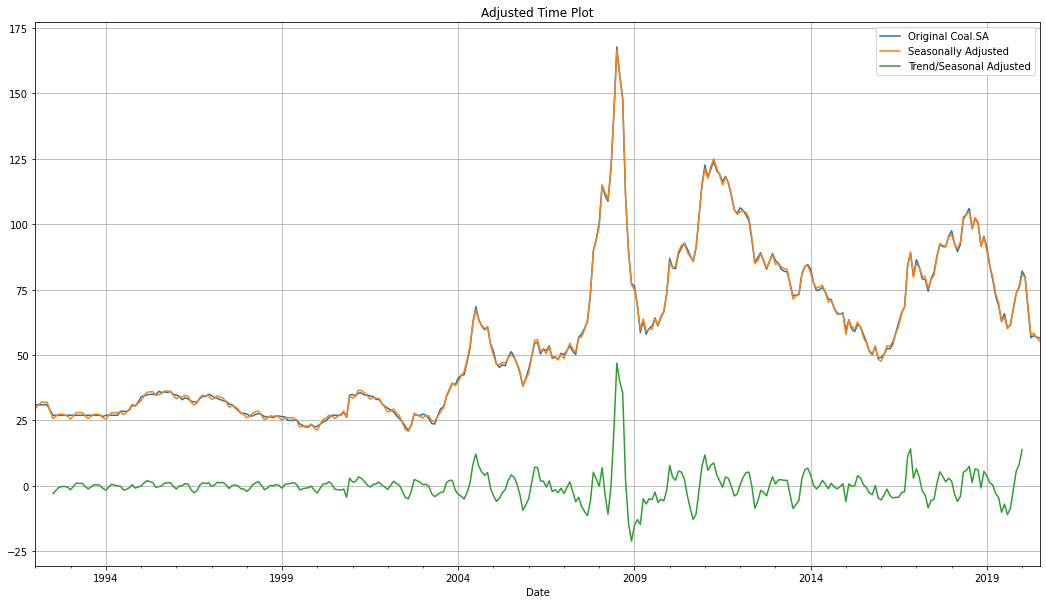

In [57]:
df["Coal.SA"].plot(label="Original Coal.SA")
df['Seasonally Adjusted'] = df['Coal.SA'] - cls_decomposition.seasonal
df["Seasonally Adjusted"].plot(label="Seasonally Adjusted")
df["Trend/Seasonal Adjusted"] = df["Coal.SA"] - cls_decomposition.seasonal- cls_decomposition.trend
df["Trend/Seasonal Adjusted"].plot(label="Trend/Seasonal Adjusted")
plt.legend();
plt.title("Adjusted Time Plot");

Here we can see that seasonality does not have a significant effect whereas the trend does.

## Handling Outliers


For every attribute we will check if there are any outliers by using box plots. We will examine the data both from years and months perspective. Since we do not have too much data, we will replace the outliers with the mean of the corresponding attribute.

### Checking Outliers (Month Perspective)


Text(0.5, 1.0, 'Coal.Producer.Index')

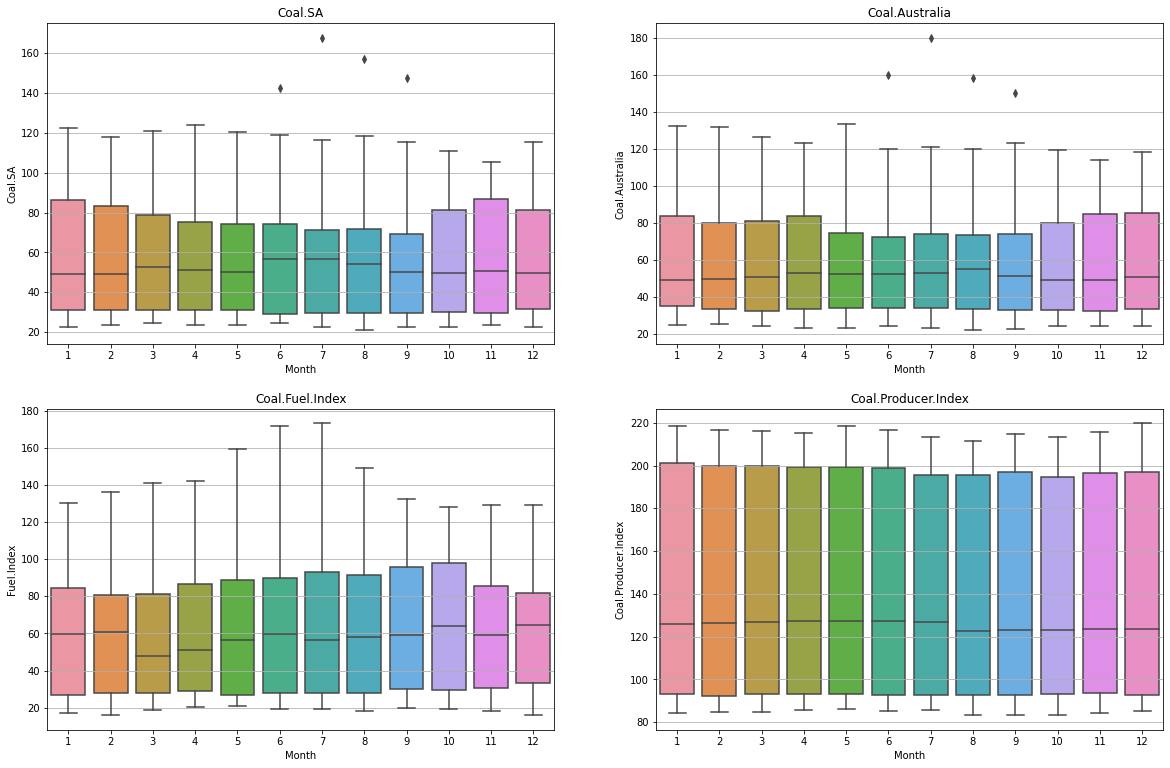

In [58]:
fig3,ax3 = plt.subplots(2,2,figsize=(20,13))
sns.boxplot(data=df, x='Month', y='Coal.SA',ax=ax3[0][0]).set_title("Coal.SA")
sns.boxplot(data=df, x='Month', y='Coal.Australia',ax=ax3[0][1]).set_title("Coal.Australia")
sns.boxplot(data=df, x='Month', y='Fuel.Index',ax=ax3[1][0]).set_title("Coal.Fuel.Index")
sns.boxplot(data=df, x='Month', y='Coal.Producer.Index',ax=ax3[1][1]).set_title("Coal.Producer.Index")

As we can see from the box-plots above we have outliers in our attributes Coal.SA and Coal.Australia.

Text(0.5, 1.0, 'Commodity.Index')

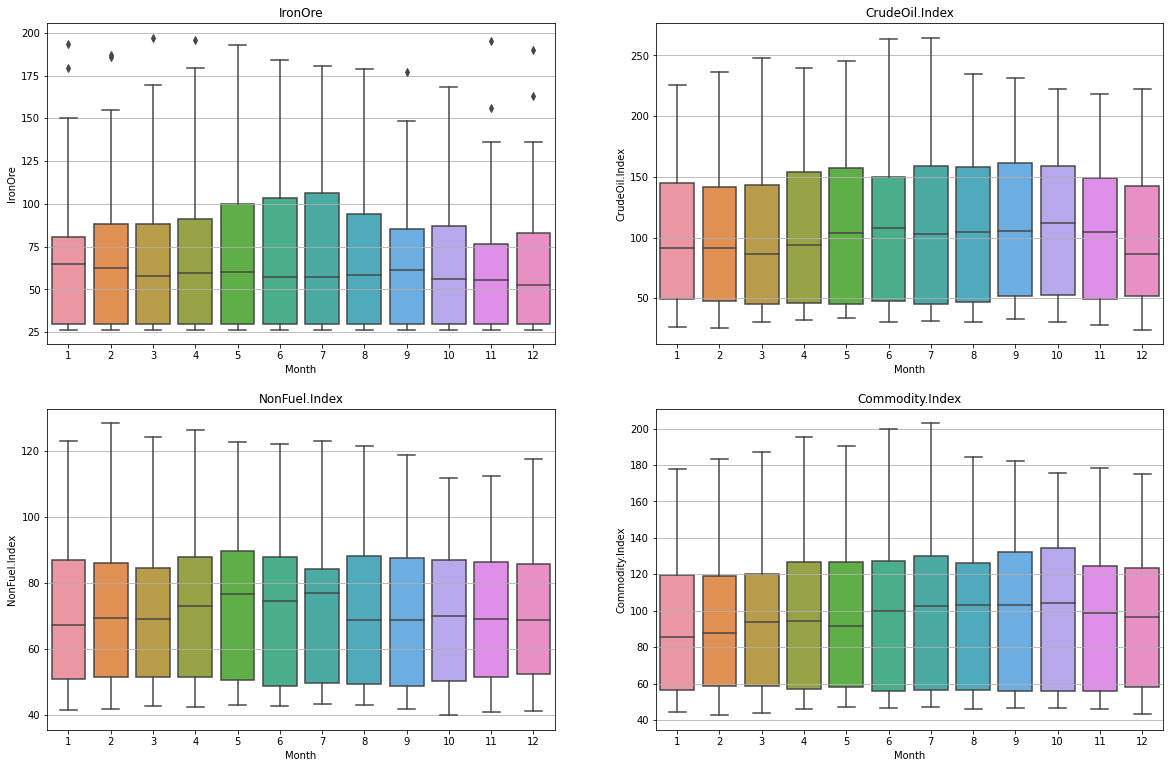

In [59]:
fig3,ax3 = plt.subplots(2,2,figsize=(20,13))
sns.boxplot(data=df, x='Month', y='IronOre',ax=ax3[0][0]).set_title("IronOre")
sns.boxplot(data=df, x='Month', y='CrudeOil.Index',ax=ax3[0][1]).set_title("CrudeOil.Index")
sns.boxplot(data=df, x='Month', y='NonFuel.Index',ax=ax3[1][0]).set_title("NonFuel.Index")
sns.boxplot(data=df, x='Month', y='Commodity.Index',ax=ax3[1][1]).set_title("Commodity.Index")

We can see that we have outliers in our attribute IronOre.

Text(0.5, 1.0, 'Metal.Index')

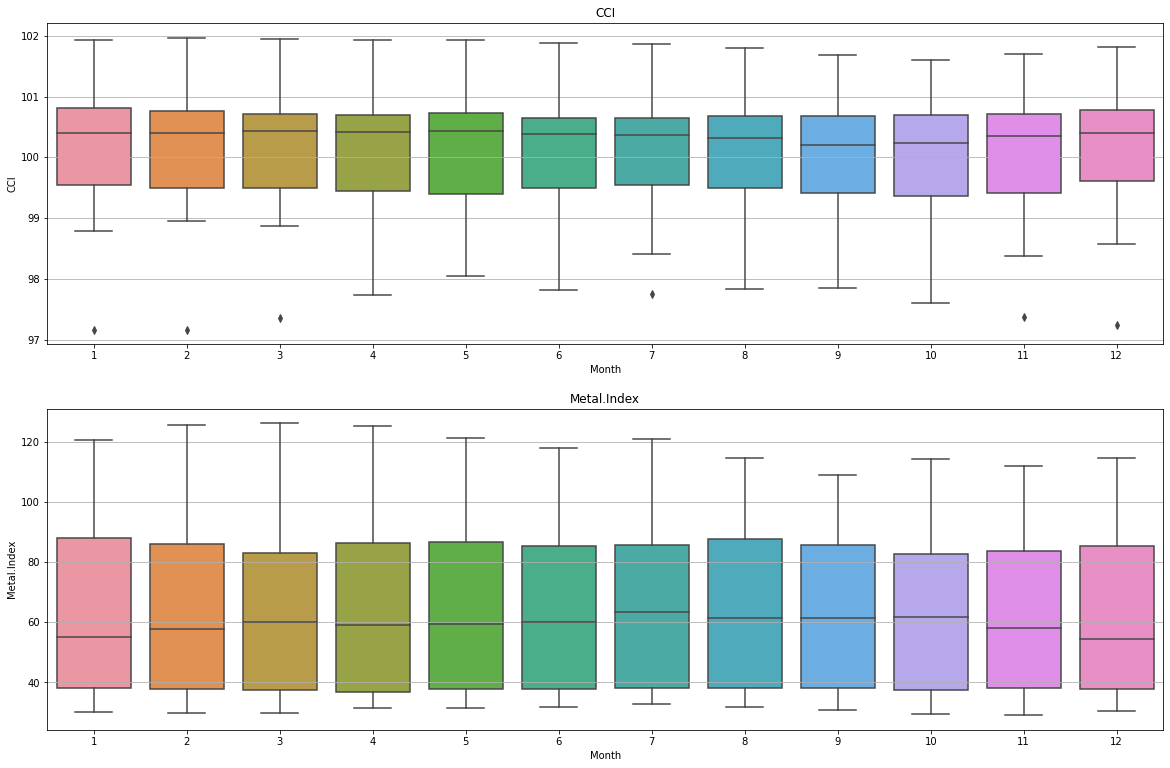

In [60]:
fig3,ax3 = plt.subplots(2,figsize=(20,13))
sns.boxplot(data=df, x='Month',ax=ax3[0],y='CCI').set_title("CCI")
sns.boxplot(data=df, x='Month',ax=ax3[1],y='Metal.Index').set_title("Metal.Index")

Our attribute CCI also contains outliers.

### Replace the Outliers
As we can see, from month perspective,in some of the variables we have outliers. We will detect them using IQR score, and if they are below the lower whisker, we will assign lower_whisker + 1 to those values, and if they are above the upper whisker we will assign upper_whisker - 1. 

In [61]:
def calculate_whiskers(attribute,time,perspective):
    Q1=df.loc[df[perspective] == time, attribute].quantile(0.25)
    Q3=df.loc[df[perspective] == time, attribute].quantile(0.75)
    IQR=Q3-Q1
    Lower_Whisker = Q1 - 1.5*IQR
    Upper_Whisker = Q3 + 1.5*IQR
    return Upper_Whisker,Lower_Whisker

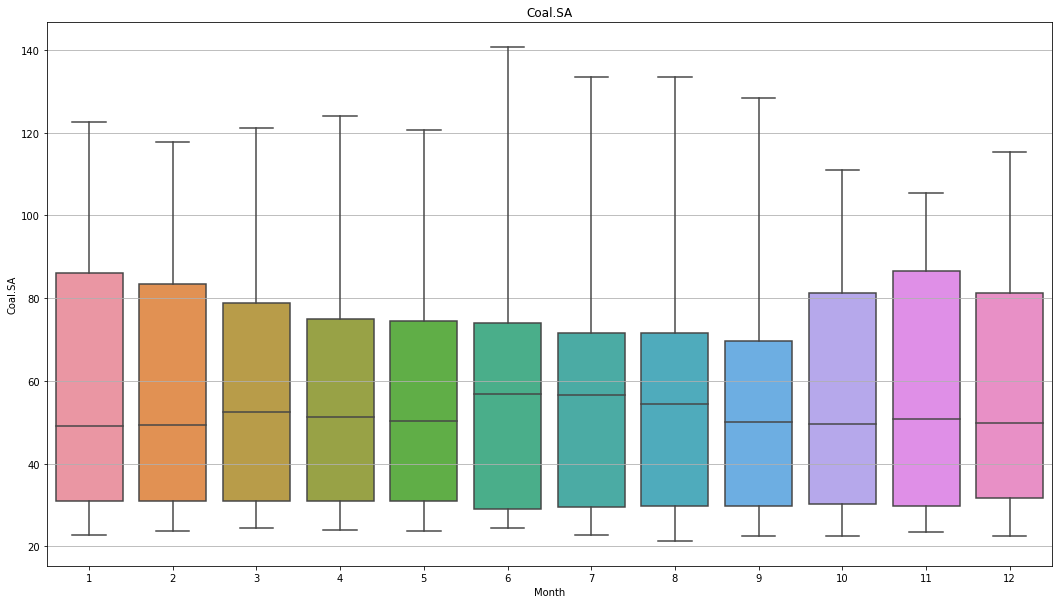

In [62]:
#For the target value "Coal.SA"
df.sort_values(by=['Coal.SA'],inplace=True)
months = [6,7,8,9]

for ind in df.index:
    for month in months:
        if (df['Month'][ind] == month): 
            Upper_Whisker,Lower_Whisker = calculate_whiskers("Coal.SA",month,"Month")
            if(df['Coal.SA'][ind] > Upper_Whisker):
                df.replace(df['Coal.SA'][ind],(Upper_Whisker-1),inplace=True)
            elif(df['Coal.SA'][ind] < Lower_Whisker):
                df.replace(df['Coal.SA'][ind],(Lower_Whisker+1),inplace=True)
            else:
                continue      
ax = sns.boxplot(data=df, x='Month', y='Coal.SA').set_title("Coal.SA")

We successfully removed our attribute Coal.SA from the outliers!

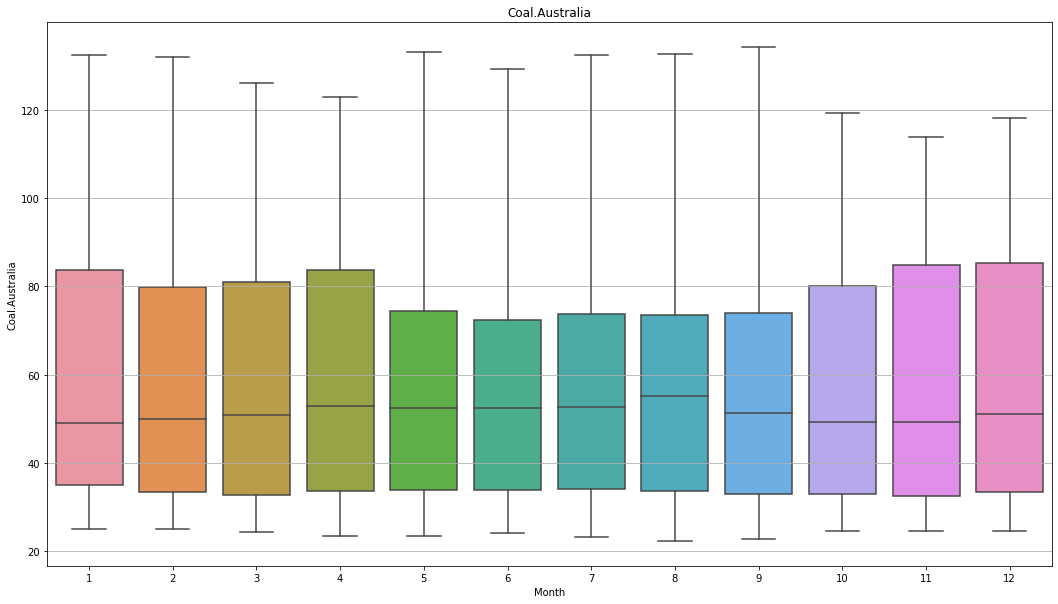

In [63]:
df.sort_values(by=['Coal.Australia'],inplace=True)

months = [6,7,8,9]

for ind in df.index:
    for month in months:
        if (df['Month'][ind] == month): 
            Upper_Whisker,Lower_Whisker = calculate_whiskers("Coal.Australia",month,"Month")
            if(df['Coal.Australia'][ind] > Upper_Whisker):
                df.replace(df['Coal.Australia'][ind],(Upper_Whisker-1),inplace=True)
            elif(df['Coal.Australia'][ind] < Lower_Whisker):
                df.replace(df['Coal.Australia'][ind],(Lower_Whisker+1),inplace=True)
            else:
                continue  
                
ax = sns.boxplot(data=df, x='Month', y='Coal.Australia').set_title("Coal.Australia")

We successfully removed our attribute Coal.Australia from the outliers!

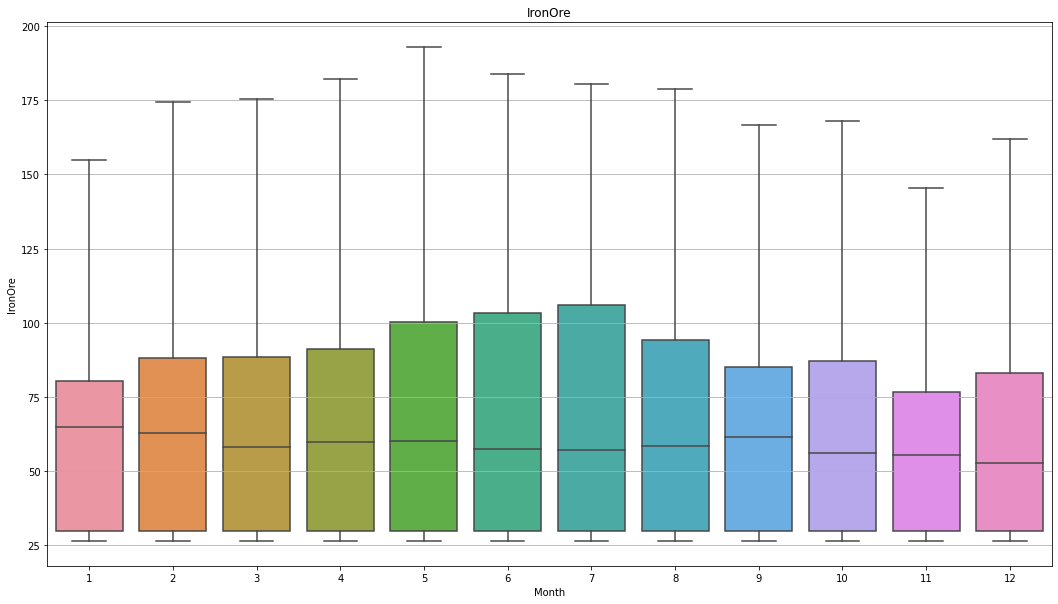

In [64]:
df.sort_values(by=['IronOre'],inplace=True)
months = [1,2,3,4,9,11,12]

for ind in df.index:
    for month in months:
        if (df['Month'][ind] == month): 
            Upper_Whisker,Lower_Whisker = calculate_whiskers("IronOre",month,"Month")
            if(df['IronOre'][ind] > Upper_Whisker):
                df.replace(df['IronOre'][ind],(Upper_Whisker-1),inplace=True)
            elif(df['IronOre'][ind] < Lower_Whisker):
                df.replace(df['IronOre'][ind],(Lower_Whisker+1),inplace=True)
            else:
                continue  

ax = sns.boxplot(data=df, x='Month', y='IronOre').set_title("IronOre")

We successfully removed our attribute IronOre from the outliers!

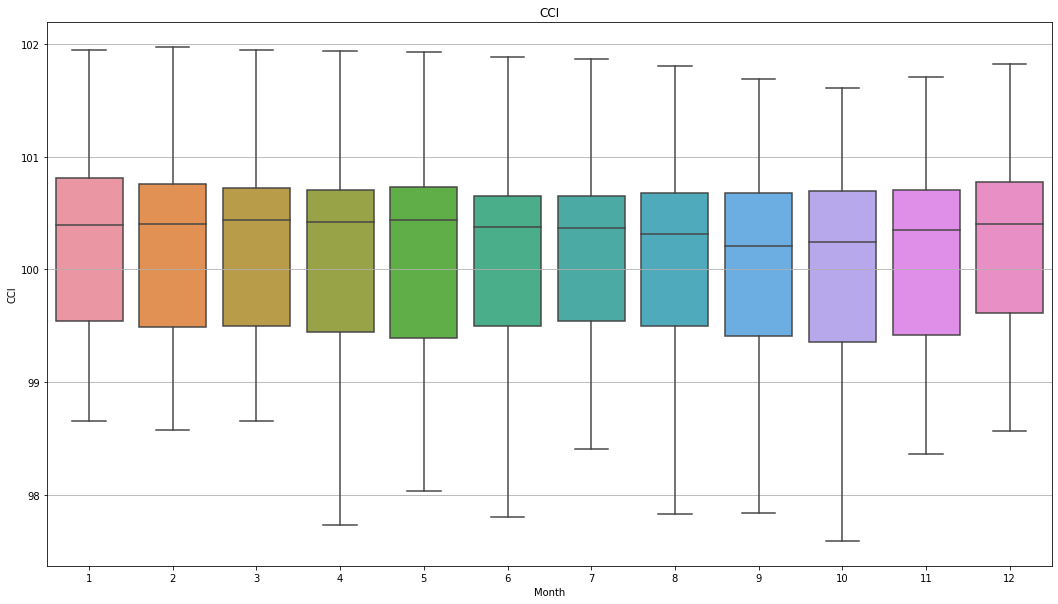

In [65]:
df.sort_values(by=['CCI'],inplace=True)

months = [1,2,3,7,11,12]

for ind in df.index:
    for month in months:
        if (df['Month'][ind] == month): 
            Upper_Whisker,Lower_Whisker = calculate_whiskers("CCI",month,"Month")
            if(df['CCI'][ind] > Upper_Whisker):
                df.replace(df['CCI'][ind],(Upper_Whisker-1),inplace=True)
            elif(df['CCI'][ind] < Lower_Whisker):
                df.replace(df['CCI'][ind],(Lower_Whisker+1),inplace=True)
            else:
                continue  

ax = sns.boxplot(data=df, x='Month', y='CCI').set_title("CCI")            

As we can see, we removed the outliers.Our data looks outlier free!

In [66]:
df.shape

(343, 14)

## Checking Outliers (Year Perspective) 
Now we will look at the outliers from year perspective.

Text(0.5, 1.0, 'Coal.Australia')

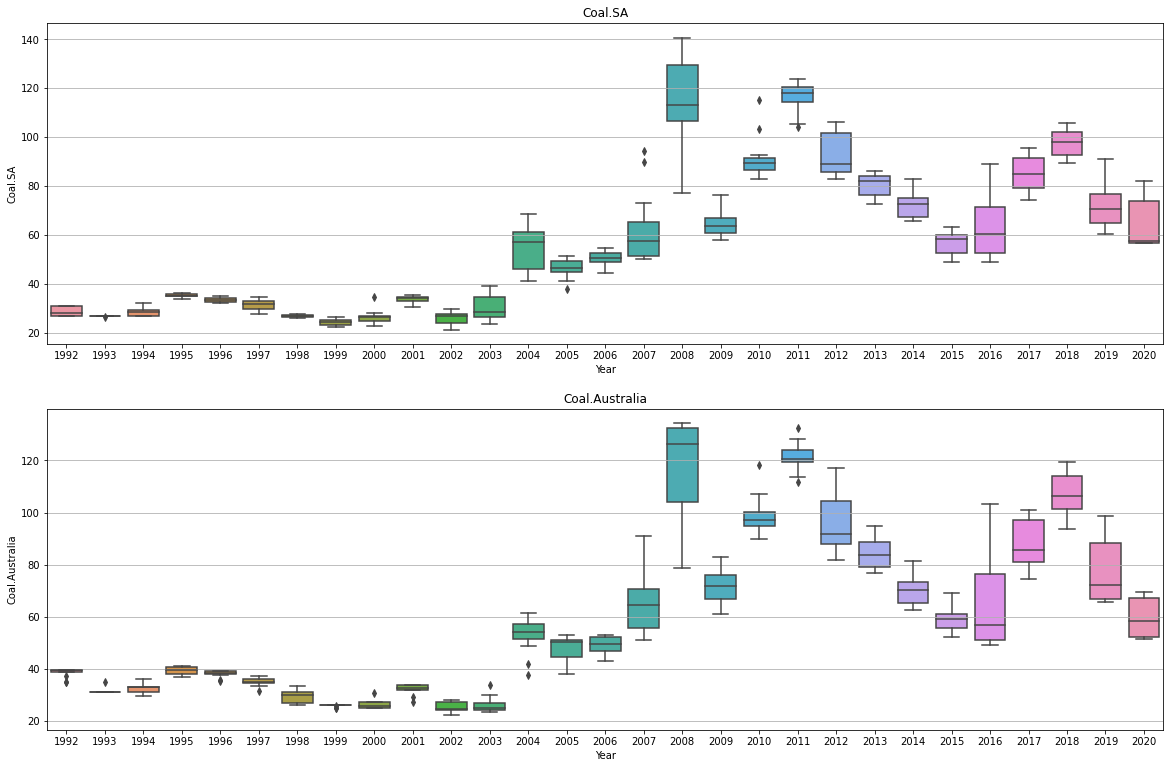

In [67]:
fig3,ax3 = plt.subplots(2,figsize=(20,13))
sns.boxplot(data=df, x='Year', y='Coal.SA',ax=ax3[0]).set_title("Coal.SA")
sns.boxplot(data=df, x='Year', y='Coal.Australia',ax=ax3[1]).set_title("Coal.Australia")

Text(0.5, 1.0, 'Coal.Producer.Index')

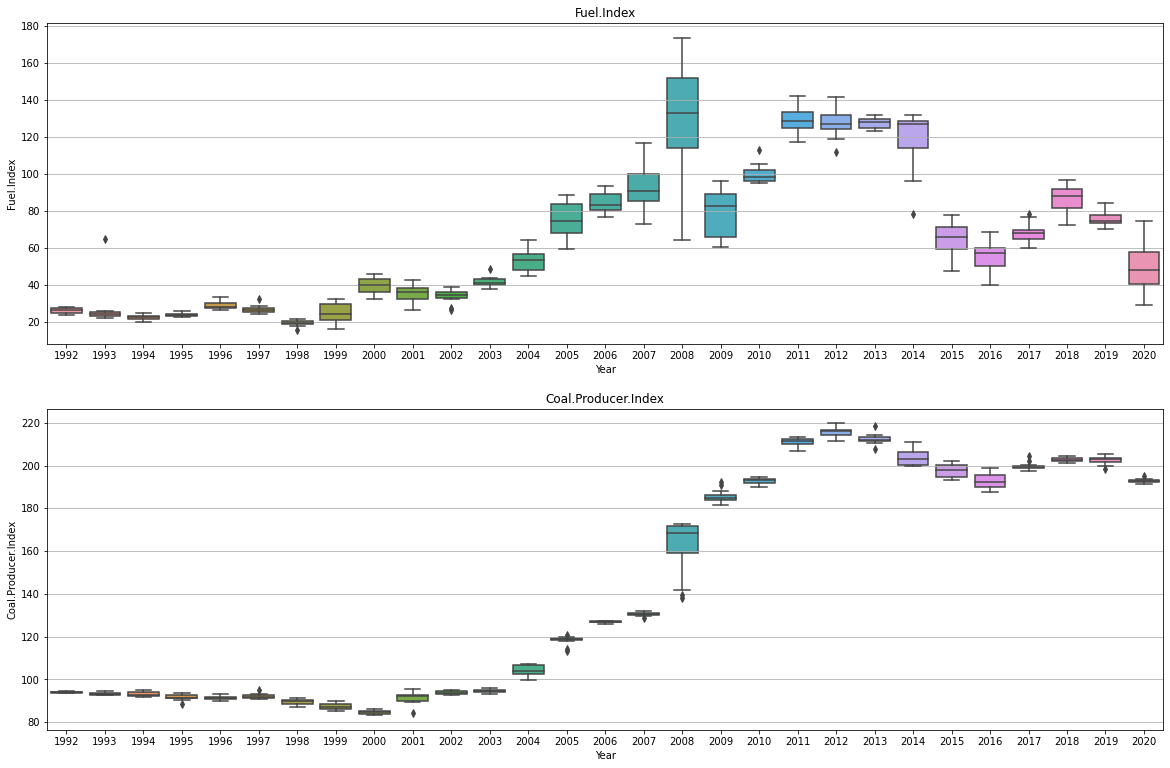

In [68]:
fig3,ax3 = plt.subplots(2,figsize=(20,13))
sns.boxplot(data=df, x='Year', y='Fuel.Index',ax=ax3[0]).set_title("Fuel.Index")
sns.boxplot(data=df, x='Year', y='Coal.Producer.Index',ax=ax3[1]).set_title("Coal.Producer.Index")

Text(0.5, 1.0, 'CrudeOil.Index')

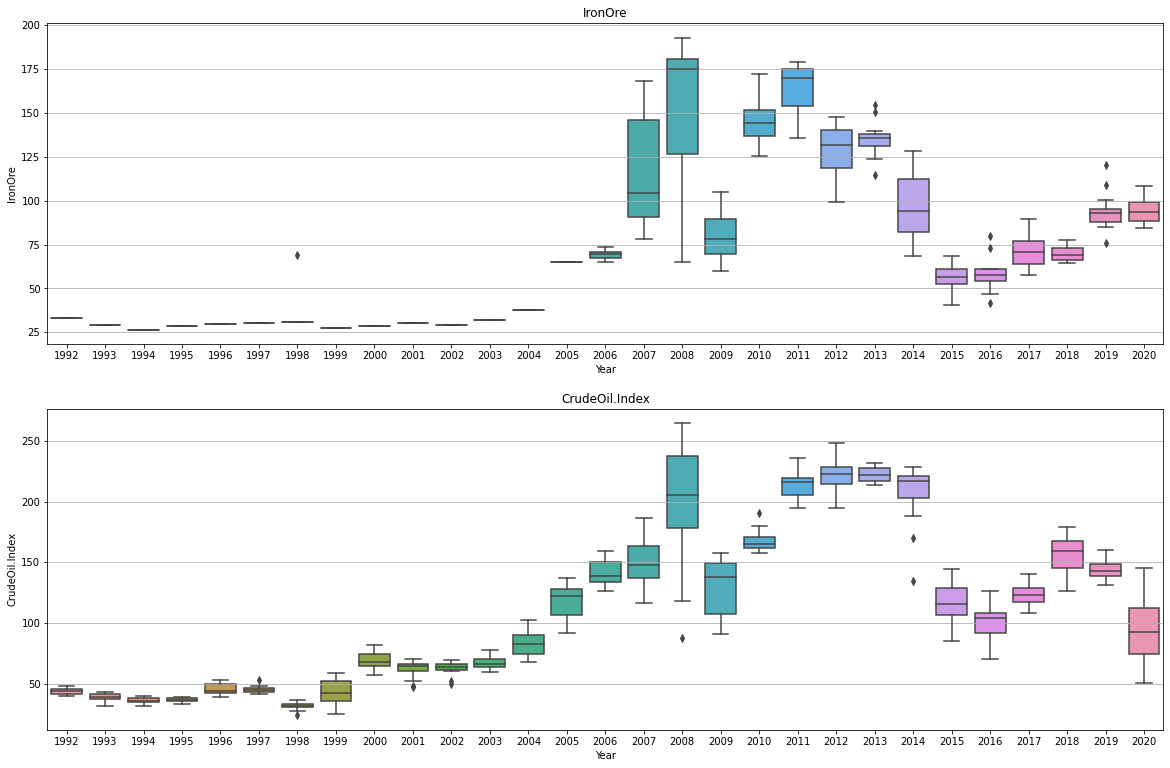

In [69]:
fig3,ax3 = plt.subplots(2,figsize=(20,13))
sns.boxplot(data=df, x='Year', y='IronOre',ax=ax3[0]).set_title("IronOre")
sns.boxplot(data=df, x='Year', y='CrudeOil.Index',ax=ax3[1]).set_title("CrudeOil.Index")

Text(0.5, 1.0, 'Commodity.Index')

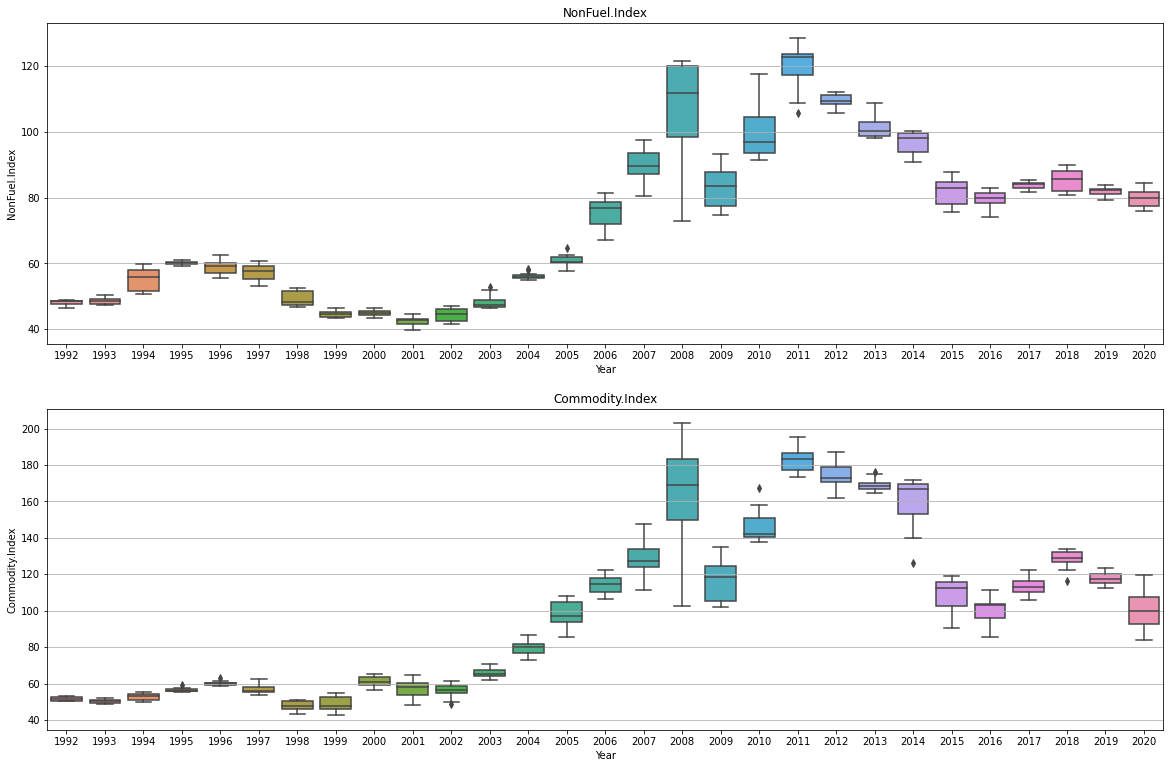

In [70]:
fig3,ax3 = plt.subplots(2,figsize=(20,13))
sns.boxplot(data=df, x='Year', y='NonFuel.Index',ax=ax3[0]).set_title("NonFuel.Index")
sns.boxplot(data=df, x='Year', y='Commodity.Index',ax=ax3[1]).set_title("Commodity.Index")

Text(0.5, 1.0, 'Metal.Index')

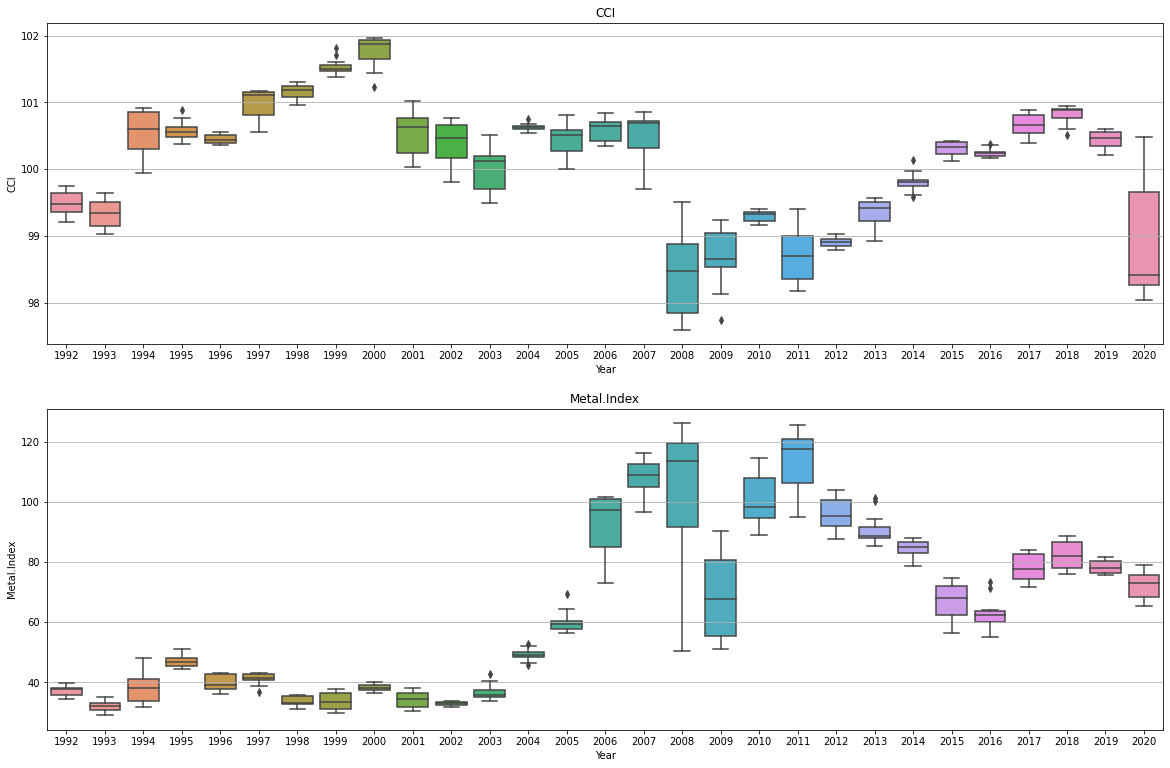

In [71]:
fig3,ax3 = plt.subplots(2,figsize=(20,13))
sns.boxplot(data=df, x='Year',ax=ax3[0],y='CCI').set_title("CCI")
sns.boxplot(data=df, x='Year',ax=ax3[1],y='Metal.Index').set_title("Metal.Index")

As we can see, from year perspective,in most of the attributes we have outliers. 

### Replacing the Outliers
We will detect outliers using IQR score. And if they are below the lower whisker, we will assign lower_whisker + 1 to those values, and if they are above the upper whisker we will assign upper_whisker - 1. 

In [72]:
#for Coal.SA
years = [1993,2000,2007,2010,2005,2011]
for ind in df.index:
    for year in years:
        if (df['Year'][ind] == year): 
            Upper_Whisker,Lower_Whisker = calculate_whiskers("Coal.SA",year,"Year")
            if(df['Coal.SA'][ind] > Upper_Whisker):
                df.replace(df['Coal.SA'][ind],(Upper_Whisker-1),inplace=True)
            elif(df['Coal.SA'][ind] < Lower_Whisker):
                df.replace(df['Coal.SA'][ind],(Lower_Whisker+1),inplace=True)
            else:
                continue 

In [73]:
#For Coal.Aus
years = [1993,1992,1997,1999,1996,2001,2003,2004,2010,2000,2011]
for ind in df.index:
    for year in years:
        if (df['Year'][ind] == year): 
            Upper_Whisker,Lower_Whisker = calculate_whiskers("Coal.Australia",year,"Year")
            if(df['Coal.Australia'][ind] > Upper_Whisker):
                df.replace(df['Coal.Australia'][ind],(Upper_Whisker-1),inplace=True)
            elif(df['Coal.Australia'][ind] < Lower_Whisker):
                df.replace(df['Coal.Australia'][ind],(Lower_Whisker+1),inplace=True)
            else:
                continue 

Text(0.5, 1.0, 'Coal.Australia after Outlier Removal')

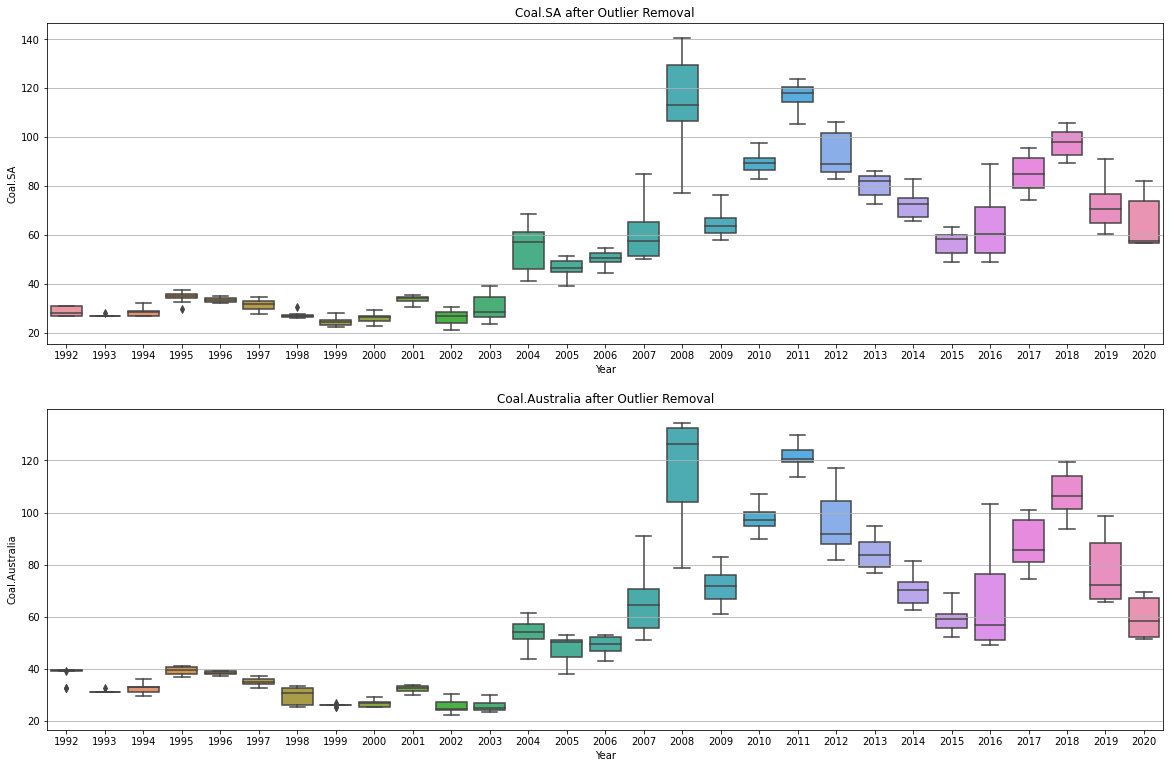

In [74]:
fig3,ax3 = plt.subplots(2,figsize=(20,13))
sns.boxplot(data=df, x='Year', y='Coal.SA',ax=ax3[0]).set_title("Coal.SA after Outlier Removal")
sns.boxplot(data=df, x='Year', y='Coal.Australia',ax=ax3[1]).set_title("Coal.Australia after Outlier Removal")

In [75]:
#For Fuel.Index
years = [1993,1998,1997,2002,2003,2012,2010,2014]
for ind in df.index:
    for year in years:
        if (df['Year'][ind] == year): 
            Upper_Whisker,Lower_Whisker = calculate_whiskers("Fuel.Index",year,"Year")
            if(df['Fuel.Index'][ind] > Upper_Whisker):
                df.replace(df['Fuel.Index'][ind],(Upper_Whisker-1),inplace=True)
            elif(df['Fuel.Index'][ind] < Lower_Whisker):
                df.replace(df['Fuel.Index'][ind],(Lower_Whisker+1),inplace=True)
            else:
                continue 


In [76]:
#For Coal Producer Index
years = [1995,2001,1997,2005,2007,2008,2009,2013,2017,2019,2020]
for ind in df.index:
    for year in years:
        if (df['Year'][ind] == year): 
            Upper_Whisker,Lower_Whisker = calculate_whiskers("Coal.Producer.Index",year,"Year")
            if(df['Coal.Producer.Index'][ind] > Upper_Whisker):
                df.replace(df['Coal.Producer.Index'][ind],(Upper_Whisker-1),inplace=True)
            elif(df['Coal.Producer.Index'][ind] < Lower_Whisker):
                df.replace(df['Coal.Producer.Index'][ind],(Lower_Whisker+1),inplace=True)
            else:
                continue 

Text(0.5, 1.0, 'Coal.Producer.Index after Outlier Removal')

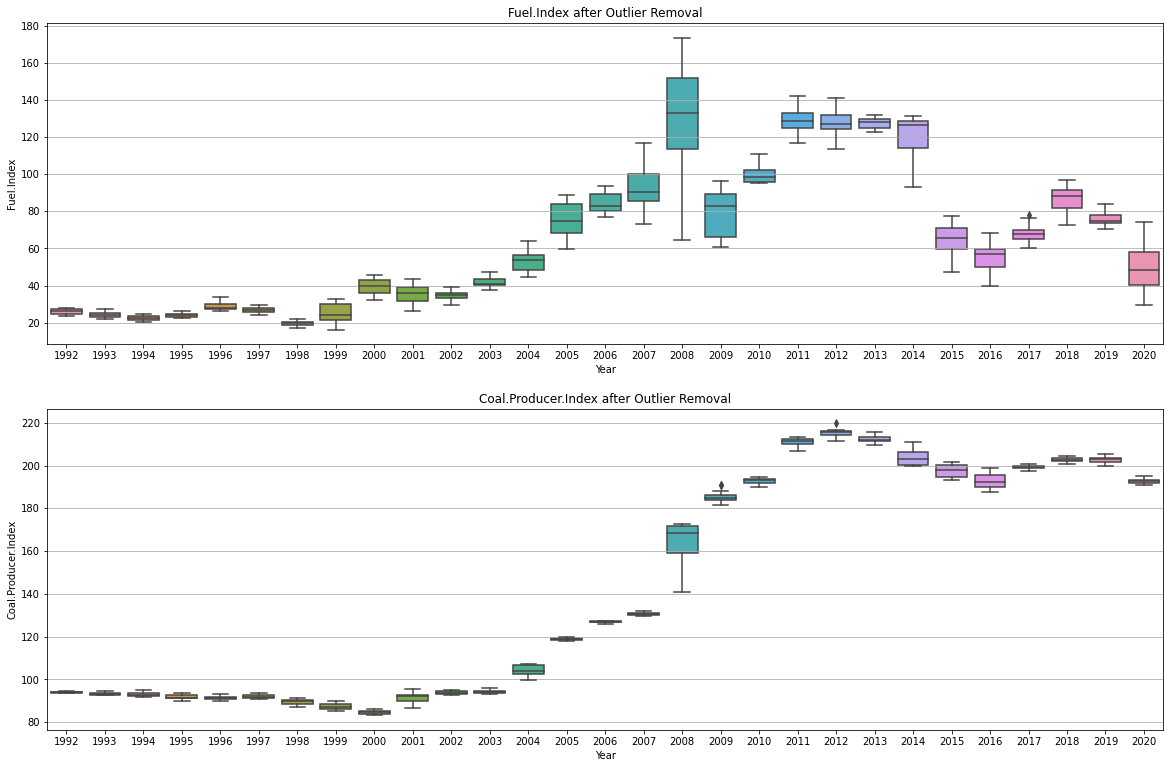

In [77]:
fig3,ax3 = plt.subplots(2,figsize=(20,13))
sns.boxplot(data=df, x='Year', y='Fuel.Index',ax=ax3[0]).set_title("Fuel.Index after Outlier Removal")
sns.boxplot(data=df, x='Year', y='Coal.Producer.Index',ax=ax3[1]).set_title("Coal.Producer.Index after Outlier Removal")

In [78]:
#For IronOre
years = [1998,2016,2013,2019]
for ind in df.index:
    for year in years:
        if (df['Year'][ind] == year): 
            Upper_Whisker,Lower_Whisker = calculate_whiskers("IronOre",year,"Year")
            if(df['IronOre'][ind] > Upper_Whisker):
                df.replace(df['IronOre'][ind],(Upper_Whisker-1),inplace=True)
            elif(df['IronOre'][ind] < Lower_Whisker):
                df.replace(df['IronOre'][ind],(Lower_Whisker+1),inplace=True)
            else:
                continue 

In [79]:
#For Crude.Oil.Index
years = [1997,1998,2001,2002,2008,2010,2014,2016,2013,2019]
for ind in df.index:
    for year in years:
        if (df['Year'][ind] == year): 
            Upper_Whisker,Lower_Whisker = calculate_whiskers("CrudeOil.Index",year,"Year")
            if(df['CrudeOil.Index'][ind] > Upper_Whisker):
                df.replace(df['CrudeOil.Index'][ind],(Upper_Whisker-1),inplace=True)
            elif(df['CrudeOil.Index'][ind] < Lower_Whisker):
                df.replace(df['CrudeOil.Index'][ind],(Lower_Whisker+1),inplace=True)
            else:
                continue 

Text(0.5, 1.0, 'CrudeOil.Index after Outlier Removal')

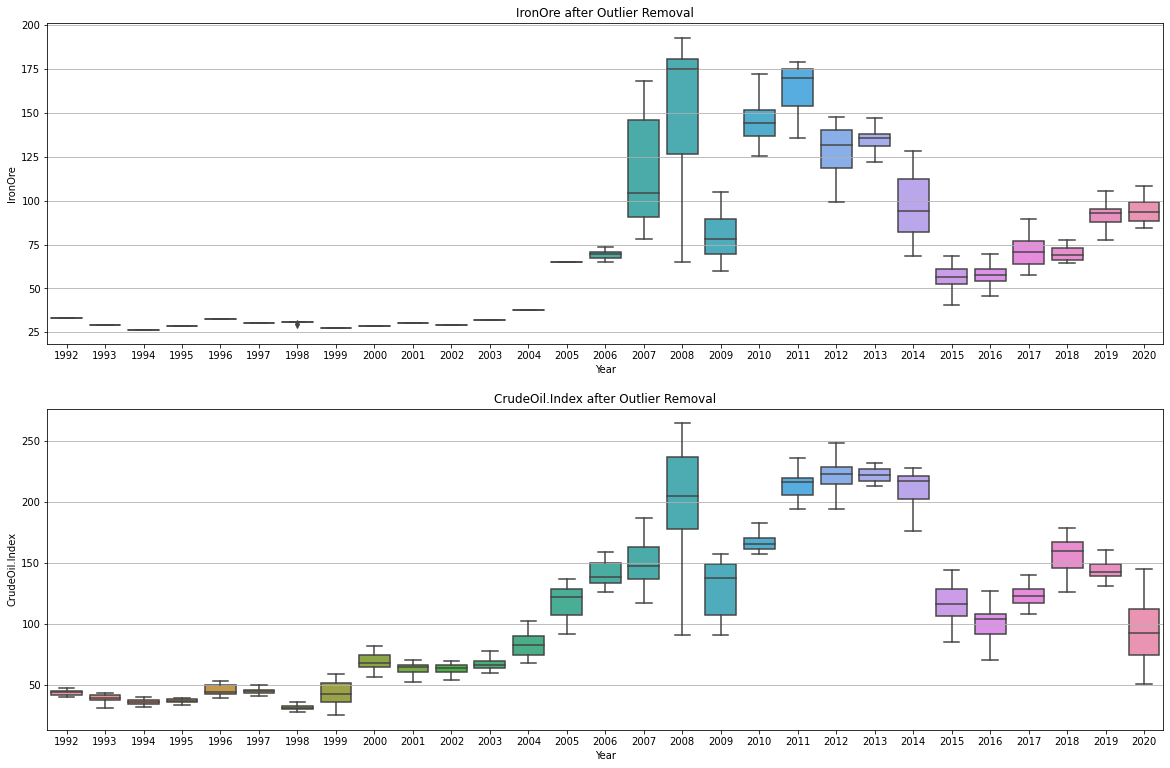

In [80]:
fig3,ax3 = plt.subplots(2,figsize=(20,13))
sns.boxplot(data=df, x='Year', y='IronOre',ax=ax3[0]).set_title("IronOre after Outlier Removal")
sns.boxplot(data=df, x='Year', y='CrudeOil.Index',ax=ax3[1]).set_title("CrudeOil.Index after Outlier Removal")

In [81]:
#For Non-Fuel Index
years = [2003,2004,2005,2011]
for ind in df.index:
    for year in years:
        if (df['Year'][ind] == year): 
            Upper_Whisker,Lower_Whisker = calculate_whiskers("NonFuel.Index",year,"Year")
            if(df['NonFuel.Index'][ind] > Upper_Whisker):
                df.replace(df['NonFuel.Index'][ind],(Upper_Whisker-1),inplace=True)
            elif(df['NonFuel.Index'][ind] < Lower_Whisker):
                df.replace(df['NonFuel.Index'][ind],(Lower_Whisker+1),inplace=True)
            else:
                continue 


In [82]:
#For Commodity.Oil.Index
years = [1995,1996,2002,2013,2010,2014,2018]
for ind in df.index:
    for year in years:
        if (df['Year'][ind] == year): 
            Upper_Whisker,Lower_Whisker = calculate_whiskers("Commodity.Index",year,"Year")
            if(df['Commodity.Index'][ind] > Upper_Whisker):
                df.replace(df['Commodity.Index'][ind],(Upper_Whisker-1),inplace=True)
            elif(df['Commodity.Index'][ind] < Lower_Whisker):
                df.replace(df['Commodity.Index'][ind],(Lower_Whisker+1),inplace=True)
            else:
                continue 

Text(0.5, 1.0, 'Commodity.Index after Outlier Removal')

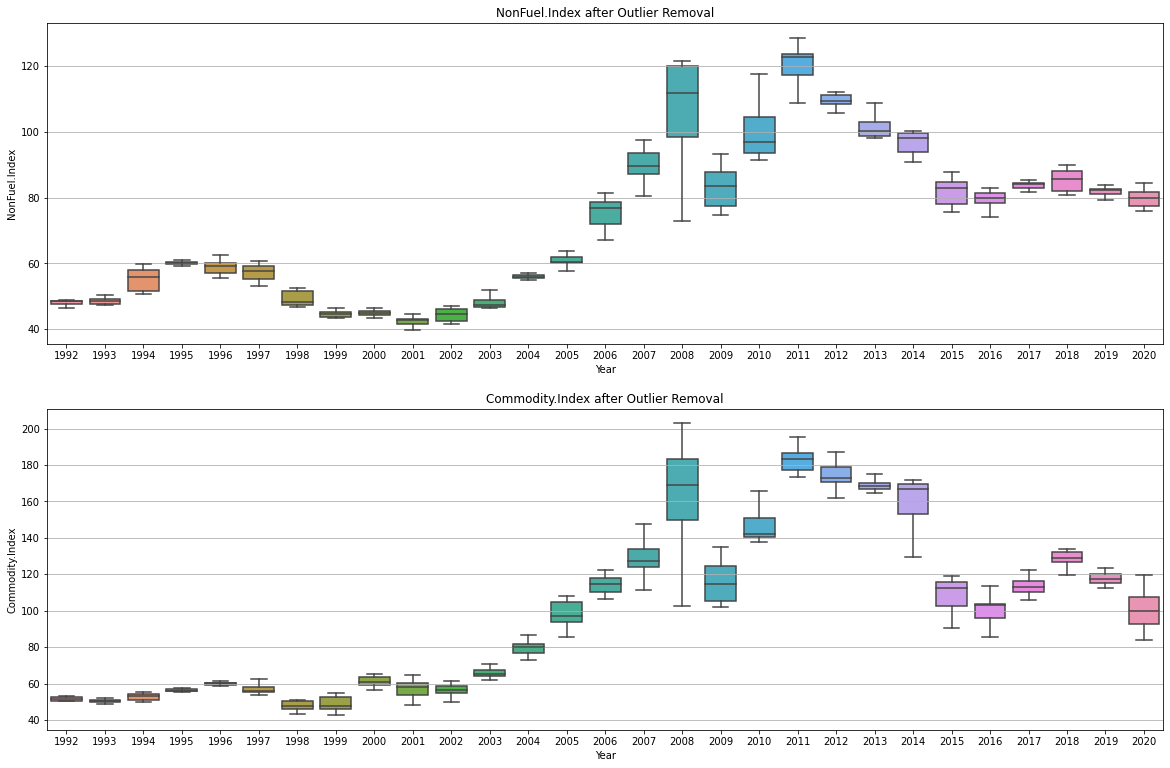

In [83]:
ffig3,ax3 = plt.subplots(2,figsize=(20,13))
sns.boxplot(data=df, x='Year', y='NonFuel.Index',ax=ax3[0]).set_title("NonFuel.Index after Outlier Removal")
sns.boxplot(data=df, x='Year', y='Commodity.Index',ax=ax3[1]).set_title("Commodity.Index after Outlier Removal")

In [84]:
#For CCI
years = [1995,1999,2000,2004,2009,2014,2016,2018]
for ind in df.index:
    for year in years:
        if (df['Year'][ind] == year): 
            Upper_Whisker,Lower_Whisker = calculate_whiskers("CCI",year,"Year")
            if(df['CCI'][ind] > Upper_Whisker):
                df.replace(df['CCI'][ind],(Upper_Whisker-1),inplace=True)
            elif(df['CCI'][ind] < Lower_Whisker):
                df.replace(df['CCI'][ind],(Lower_Whisker+1),inplace=True)
            else:
                continue 


In [85]:
#For Metal Index
years = [2003,2004,2005,2013,2016,1997]
for ind in df.index:
    for year in years:
        if (df['Year'][ind] == year): 
            Upper_Whisker,Lower_Whisker = calculate_whiskers("Metal.Index",year,"Year")
            if(df['Metal.Index'][ind] > Upper_Whisker):
                df.replace(df['Metal.Index'][ind],(Upper_Whisker-1),inplace=True)
            elif(df['Metal.Index'][ind] < Lower_Whisker):
                df.replace(df['Metal.Index'][ind],(Lower_Whisker+1),inplace=True)
            else:
                continue 

In [86]:
df=df.sort_index()

Text(0.5, 1.0, 'Metal.Index after Outlier Removal')

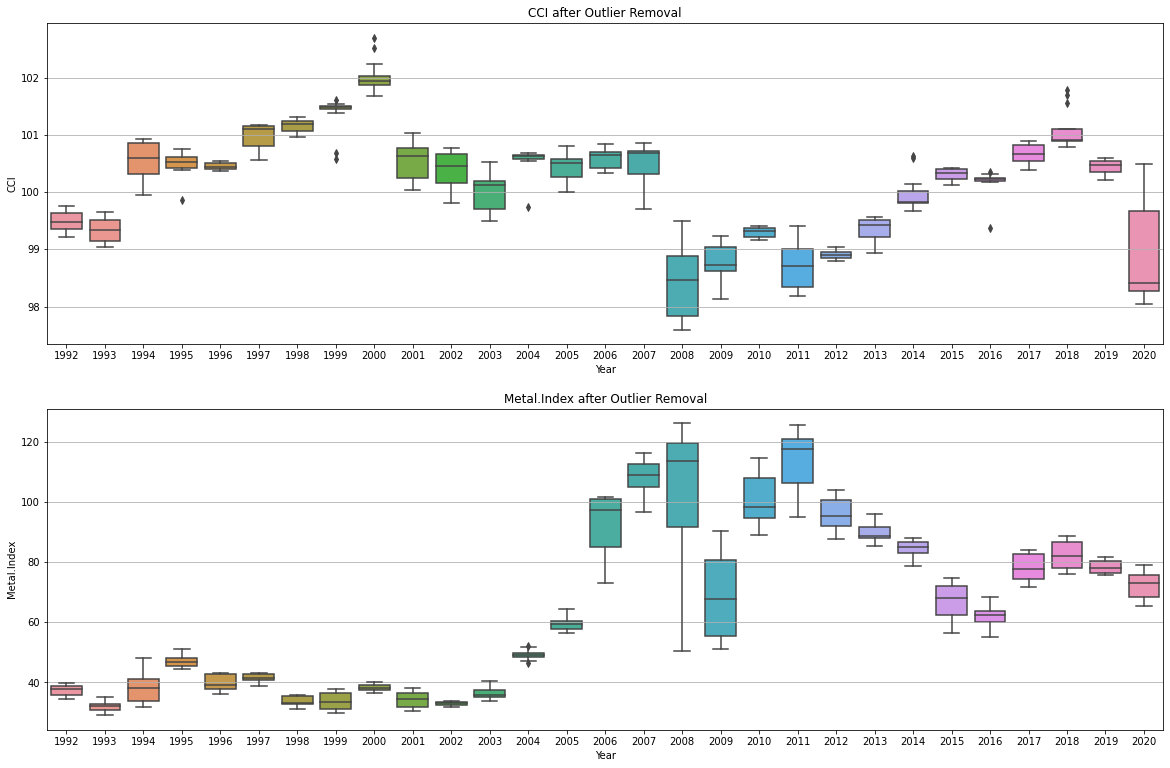

In [87]:
fig3,ax3 = plt.subplots(2,figsize=(20,13))
sns.boxplot(data=df, x='Year',ax=ax3[0],y='CCI').set_title("CCI after Outlier Removal")
sns.boxplot(data=df, x='Year',ax=ax3[1],y='Metal.Index').set_title("Metal.Index after Outlier Removal")

We handled outliers in years perspective as seen in the graphs. We believe the reason for the outliers is the economic crise in 2008. There was a sharp slowdown in demand,and with mining output remaining stubbornly high. Therefore, coal benchmarks fell down.

## Stationarity 

As mentioned in the trend section, we need to further check stationarity using these methods:

ADF plot: If most of the (95%) autocorrelation values are within the confidence interval, we can conclude that the series is stationary.

Dickey-Fuller Test: The test results comprise of a Test Statistic and some Critical Values for difference confidence levels. If the test statistic is less than the critical value (0.05), we can say that time series is stationary.

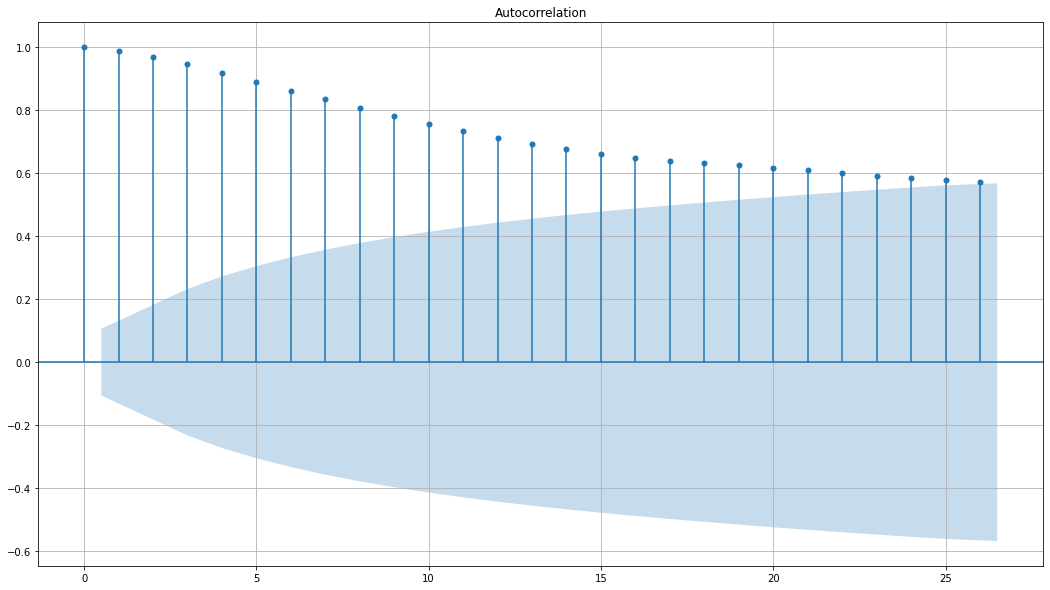

In [88]:
plot_acf(df["Coal.SA"]);

Looking at the ACF plot, since none of the lags are within the confidence interval, we can conclude that the Coal.SA series is non-stationary.

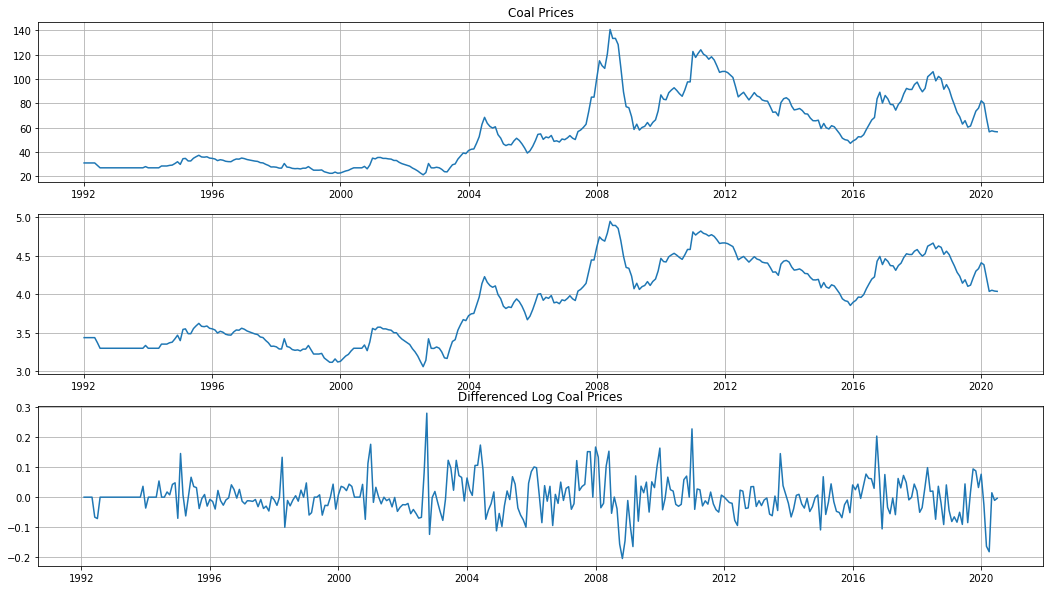

In [89]:
fig, ax = plt.subplots(3);
ax[0].plot(df["Coal.SA"]);
ax[0].set_title("Coal Prices")
ax[1].plot(np.log(df["Coal.SA"]))
ax[2].plot(df["Coal.SA"].apply(lambda x: np.log(x)).diff(periods=1));
ax[2].set_title("Differenced Log Coal Prices");

Looking at the time plots, the differenced series look a lot more stationary than the original series. We need to further inspect using ADF method as mentioned above.

In [90]:
from statsmodels.tsa.stattools import adfuller
# check for stationarity
def adf_test(series,title=''):
    """
    Pass in a time series and an optional title, returns an ADF report
    """
    print('Augmented Dickey-Fuller Test: {}'.format(title))
    result = adfuller(series.dropna(),autolag='AIC') # .dropna() handles differenced data
    
    labels = ['ADF test statistic','p-value','# lags used','# observations']
    out = pd.Series(result[0:4],index=labels)

    for key,val in result[4].items():
        out['critical value ({})'.format(key)]=val
        
    print(out.to_string())          # .to_string() removes the line "dtype: float64"
    
    if result[1] <= 0.05:
        print("Strong evidence against the null hypothesis")
        print("Reject the null hypothesis")
        print("Data has no unit root and is stationary")
    else:
        print("Weak evidence against the null hypothesis")
        print("Fail to reject the null hypothesis")
        print("Data has a unit root and is non-stationary")

In [91]:
adf_test(df["Coal.SA"],title='')  

Augmented Dickey-Fuller Test: 
ADF test statistic       -1.820749
p-value                   0.370210
# lags used              13.000000
# observations          329.000000
critical value (1%)      -3.450384
critical value (5%)      -2.870365
critical value (10%)     -2.571472
Weak evidence against the null hypothesis
Fail to reject the null hypothesis
Data has a unit root and is non-stationary


In [92]:
adf_test(df["Coal.SA"].apply(lambda x: np.log(x)).diff(periods=1), title='')     

Augmented Dickey-Fuller Test: 
ADF test statistic     -8.133588e+00
p-value                 1.073929e-12
# lags used             2.000000e+00
# observations          3.390000e+02
critical value (1%)    -3.449788e+00
critical value (5%)    -2.870104e+00
critical value (10%)   -2.571332e+00
Strong evidence against the null hypothesis
Reject the null hypothesis
Data has no unit root and is stationary


In order to make the series stationary, we are using differencing to trend effects from the original series.

# ARIMA

(p,d,q) is parameters of ARIMA model.

In order to choose p,d,q parameters we will use two different plots.

1) Autocorrelation Function (ACF): Measurement of the correlation between time series and lagged version of time series.

2) Partial Autocorrelation Function (PACF): This measures the correlation between the time series and lagged version of time series but after eliminating the variations already explained by the intervening comparisons.



In [93]:
ts=df["Coal.SA"].apply(lambda x: np.log(x)).diff(periods=1).dropna()
# computing the Differenced Log values to be used for plotting ACF and PACF

Now after the EDA part is done, we are only interested in certain attributes which have high correlation with the "Coal.SA". We discard away the rest of the features.

In [94]:
final_features = df[['Coal.Australia','Coal.SA','Fuel.Index', 'Coal.Producer.Index',
       'IronOre', 'CrudeOil.Index', 'Metal.Index', 'NonFuel.Index',
       'Commodity.Index', 'CCI']]   

**ACF-PACF Plots**

Text(0.5, 0.98, 'ACF and PCF plots for Differenced Log Time series')

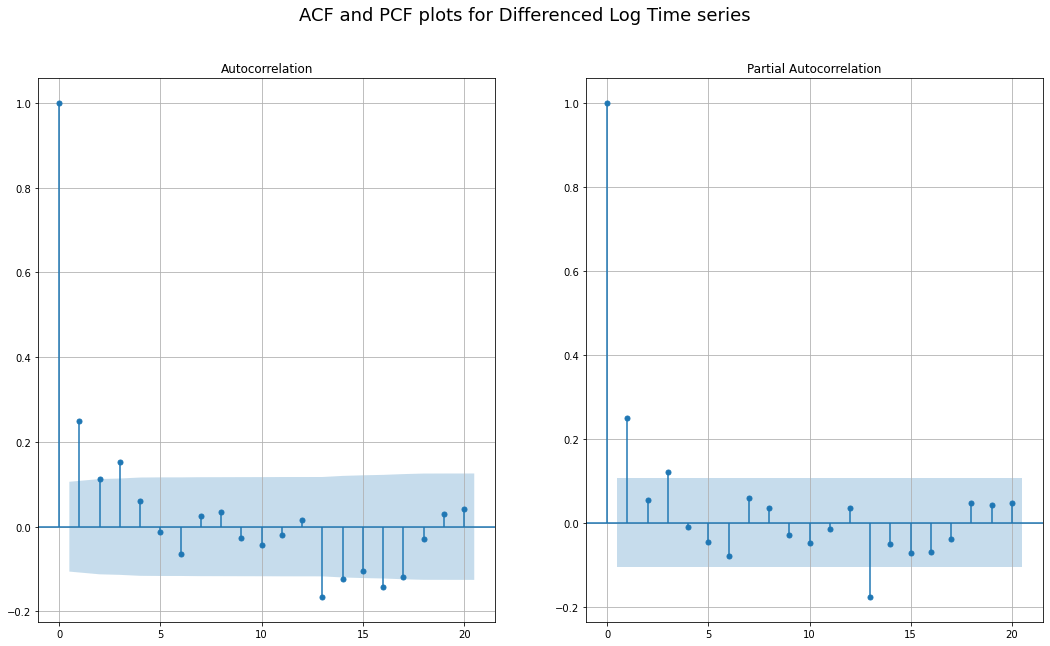

In [95]:
import matplotlib as mpl
mpl.rcParams['axes.grid'] = True ## Set true for getting grid lines
fig, ax = plt.subplots(1,2)
plot_acf(ts, lags=20, ax=ax[0]);
plot_pacf(ts, lags=20, ax=ax[1]);
plt.suptitle ('ACF and PCF plots for Differenced Log Time series', fontsize=18)

Two dotted lines are the confidence interevals. We use these lines to determine the ‘p’ and ‘q’ values

The data may follow an ARIMA(p,d,0) model if the ACF and PACF plots of the differenced data show the following patterns:

    the ACF is exponentially decaying or sinusoidal;
    
    there is a significant spike at lag  p in the PACF, but none beyond lag p.

The data may follow an ARIMA(0, d, q) model if the ACF and PACF plots of the differenced data show the following patterns:

    the PACF is exponentially decaying or sinusoidal;
    
    there is a significant spike at lag  q in the ACF, but none beyond lag q.

Looking at the PACF plot, we can say that there is a significant spike at lag 1 and none beyond lag 1, therefore ARIMA(1,0,0) is a strong candidate. Of course, when we use the original series (not differenced), we need to use ARIMA(1,1,0) to account for differencing.

# **1st Model**

Using the parameters (1,1,0) from above, we create a simple model. Here we will fit the model using the prices of 'Coal.SA' and p,d,q parameter values.
Later, we will forecast the values of 'Coal.SA' and evaluate the loss.

**Model Fitting**

In [96]:
from pandas import datetime
import warnings
from statsmodels.tsa.statespace.sarimax import SARIMAX
warnings.filterwarnings("ignore")

model = SARIMAX(df['Coal.SA'], order=(1,1,0))
model_fit = model.fit(disp=0)
results=model.fit()

ipykernel_launcher:1: FutureWarning: The pandas.datetime class is deprecated and will be removed from pandas in a future version. Import from datetime module instead.


**Forecasting**

In [97]:
# FROM and TO prediction dates
start_index = datetime(2016, 1, 1)
end_index = datetime(2020, 7, 1)

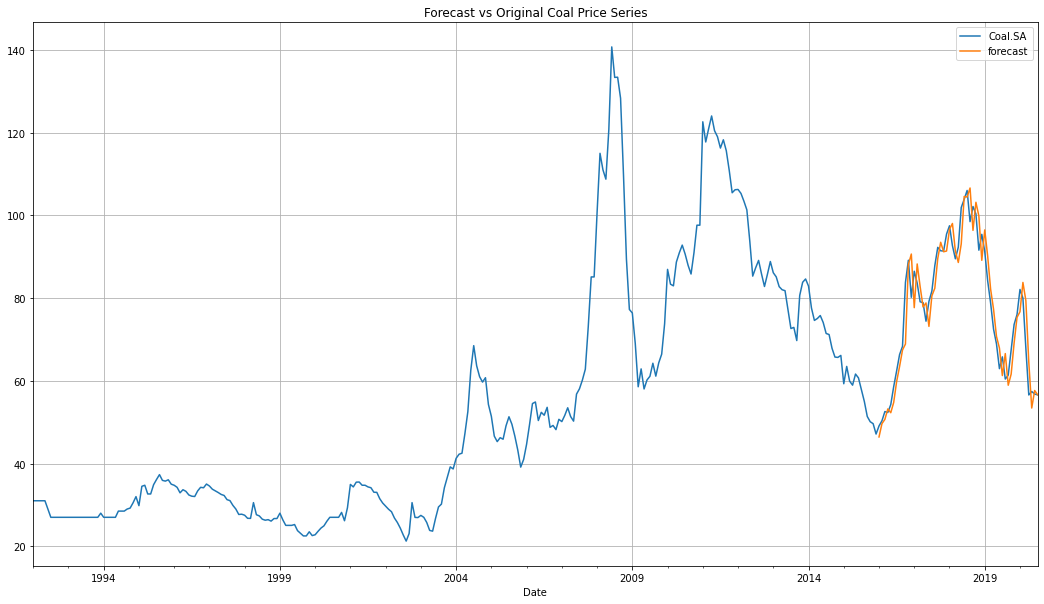

In [98]:
mpl.rcParams['axes.grid'] = True ## Set true for getting grid lines
df['forecast']=results.predict(start=start_index, end=end_index)
df[['Coal.SA','forecast']].plot();
plt.title("Forecast vs Original Coal Price Series");

We can see from the above plot that the model fits pretty well and the forecast results are pretty decent.

Now we are interested in evaluating our model using the RMSE and R^2. In the best case scenario, RMSE should be close to 0 and R^2 should be nearly 1.

**Model Evaluation**

In [99]:
from sklearn.metrics import mean_squared_error, r2_score

actual=df["Coal.SA"][-55:]
forecast=df["forecast"][-55:]
actual = actual.values
print("RMSE =",mean_squared_error(actual, forecast, squared = False))
print("R^2 score =", round(r2_score(actual, forecast), 2))

RMSE = 5.133194144279866
R^2 score = 0.9


The above results are also decent. But we would want to explore ways to improve our model.

This is a multivariate Time series with more than one time-dependent variable. Our target attribute, "Coal.SA" depends on its past values but also has some dependency on other variables. This dependency should also be taken into account when predicting values. 

In the first model we did not make use of other attributes to fit our model. We only used the past values of "Coal.SA" to predict it's future values. 

One thing that we can try now is, including the exogenous variables in the model. These are the variables whose value is determined outside the model and is imposed on the model. Since the other variables in our model has high correlation with "Coal.SA" therefore they can influence it's value. So we will include them to fit our model. 


# **2nd Model**

**Adding exogenous features**

In [100]:
for_exog_array = final_features
for_exog_array = for_exog_array.drop(['Coal.SA'], axis=1)
# Storing the exogenous features. Apart from our target feature all othe features with high correlation with target feature can be considered as the exogenous features. 
exog = for_exog_array.to_numpy()

**Model Fitting**

In [101]:
# include exogenous features to fit our model
model2 = SARIMAX(df['Coal.SA'], order=(1,1,0), seasonal_order=(0,0,0,13), exog=exog)
model_fit2 = model2.fit(disp=0)
results2 = model2.fit()

**Model Evaluation**

In [102]:
df['forecast2'] = results2.predict(start=start_index, end=end_index)
forecast2 = df["forecast2"][-55:]

print("RMSE =",mean_squared_error(actual, forecast2, squared = False))
print("R^2 score =", round(r2_score(actual, forecast2), 2))

RMSE = 3.112412636392798
R^2 score = 0.96


We observe that by adding the exogenous variables to our model, the RMSE score is now closer to 0 and R^2 is closer to 1

But we can still try out some options to improve the accuaracy of our model. We would want to explore some other combinations of the parameters that might improve the model.

# **SARIMAX Model- 6 Parameters**

We keep the seasonality as 0. For chosing the best set of remaining 6 parameters, we plan to try all the combinations of the 6 parameters and use each combination individually to train our SARIMAX model. Now for each SARIMAX model, we can look at the BIC/AIC scores and select the combination of parameters which gives us the least BIC/AIC score.

AIC and BIC are methods to penalize models for having more regressor variables. A penalty function is used in these methods, which is a function of the number of parameters in the model.


1.   When applying AIC, the penalty function is z(p) = 2 p.
2.   When applying BIC, the penalty function is z(p) = p ln(n), which is based on interpreting the penalty as deriving from prior information (hence the name Bayesian Information Criterion).

When n is large, the two models will produce quite different results. Then the BIC applies a much larger penalty for complex models, and hence will lead to simpler models than AIC.

Hence, we prefer low BIC scores over low AIC scores to determine the best model because AIC always has a chance of choosing too big a model, regardless of n. On the other hand, BIC has very little chance of choosing too big a model if n is sufficient.

We will test the models for different values of (p, d and q) and (seasonal_p,seasonal_d and seasonal_q) from (0, 1 and 2) and we keep the seasonal order to be 0 as from the EDA we have observed that there is no seasonality in our data. 
 

In [103]:
import itertools
p = d = q = range(0,3)
pdq = list(itertools.product(p,d,q))
seasonal_pdq = [(x[0], x[1], x[2], 0) for x in list(itertools.product(p,d,q))]
print("examples of parameter combinations or Seasonal ARIMA...")
print("SARIMAX: {} * {}".format(pdq[1], seasonal_pdq[1]))
print("SARIMAX: {} * {}".format(pdq[1], seasonal_pdq[2]))
print("SARIMAX: {} * {}".format(pdq[2], seasonal_pdq[3]))
print("SARIMAX: {} * {}".format(pdq[2], seasonal_pdq[4]))
print("SARIMAX: {} * {}".format(pdq[3], seasonal_pdq[5]))



examples of parameter combinations or Seasonal ARIMA...
SARIMAX: (0, 0, 1) * (0, 0, 1, 0)
SARIMAX: (0, 0, 1) * (0, 0, 2, 0)
SARIMAX: (0, 0, 2) * (0, 1, 0, 0)
SARIMAX: (0, 0, 2) * (0, 1, 1, 0)
SARIMAX: (0, 1, 0) * (0, 1, 2, 0)


We will use all the combination of parameters individually to fit our model and then calculate the BIC scores for all the models. We then display the results in the ascending order of their BIC values.

**Grid Search for best model parameters** (allow some time for execution)

In [104]:
import operator
metric_bic_dict = dict()

for pm in pdq:
  for pm_seasonal in seasonal_pdq:
    try:
      model_test2 = SARIMAX(df['Coal.SA'], order=pm, seasonal_order=pm_seasonal, exog=exog)
      model_bic = model_test2.fit()
      metric_bic_dict.update({(pm, pm_seasonal):model_bic.bic})
    except:
      continue

sorted_bic = sorted(metric_bic_dict.items(), key=operator.itemgetter(1))
sorted_bic[:10]      

[(((1, 0, 0), (0, 0, 0, 0)), 1741.0103056713908),
 (((2, 0, 0), (0, 0, 0, 0)), 1745.26755473545),
 (((1, 0, 1), (0, 0, 0, 0)), 1745.4923178226165),
 (((1, 0, 2), (0, 0, 0, 0)), 1749.6915845585893),
 (((2, 0, 1), (0, 0, 0, 0)), 1750.5551408552096),
 (((0, 1, 0), (0, 0, 0, 0)), 1754.0938191937273),
 (((0, 1, 1), (0, 0, 0, 0)), 1754.1524784104358),
 (((1, 1, 0), (0, 0, 0, 0)), 1754.1581736212308),
 (((2, 1, 2), (0, 0, 0, 0)), 1754.3953298203896),
 (((2, 0, 2), (0, 0, 0, 0)), 1755.443476817429)]

Hence, We choose the parameters with lowest BIC scores

# **FINAL MODEL**

**Model Fitting**

In [105]:
final_model = SARIMAX(df['Coal.SA'], order=(1,0,0), seasonal_order=(0,0,0,0), exog=exog)
final_model_fit = final_model.fit(disp=0)
print(final_model_fit.summary())

final_results = final_model.fit()

                               SARIMAX Results                                
Dep. Variable:                Coal.SA   No. Observations:                  343
Model:               SARIMAX(1, 0, 0)   Log Likelihood                -838.398
Date:                Mon, 07 Jun 2021   AIC                           1698.795
Time:                        22:04:25   BIC                           1741.010
Sample:                    01-01-1992   HQIC                          1715.611
                         - 07-01-2020                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
x1             0.5871      0.025     23.199      0.000       0.537       0.637
x2             0.1087      0.109      1.001      0.317      -0.104       0.322
x3             0.0372      0.030      1.246      0.2

**Model Evaluation**

In [106]:
df['forecast_f'] = final_results.predict(start=start_index, end=end_index)
forecast_f = df["forecast_f"][-55:]

print("RMSE =",mean_squared_error(actual, forecast_f, squared = False))
print("R^2 score =", round(r2_score(actual, forecast_f), 2))

RMSE = 3.0147101852019196
R^2 score = 0.96


**Forecasting**

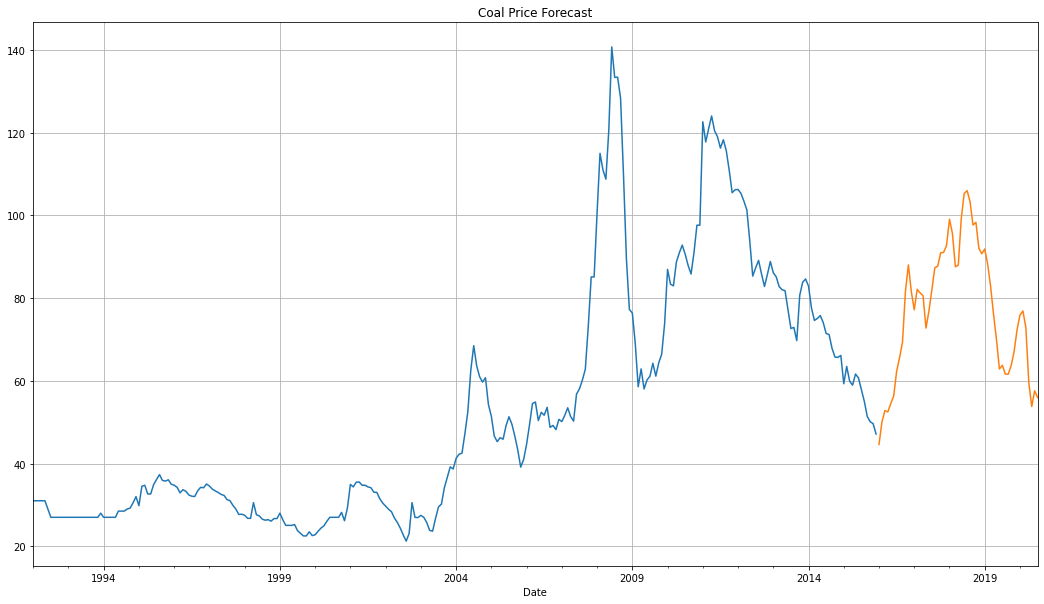

In [107]:
mpl.rcParams['axes.grid'] = True ## Set true for getting grid lines
df["Coal.SA"][:-55].plot();
df['forecast_f'].plot();
plt.title("Coal Price Forecast");

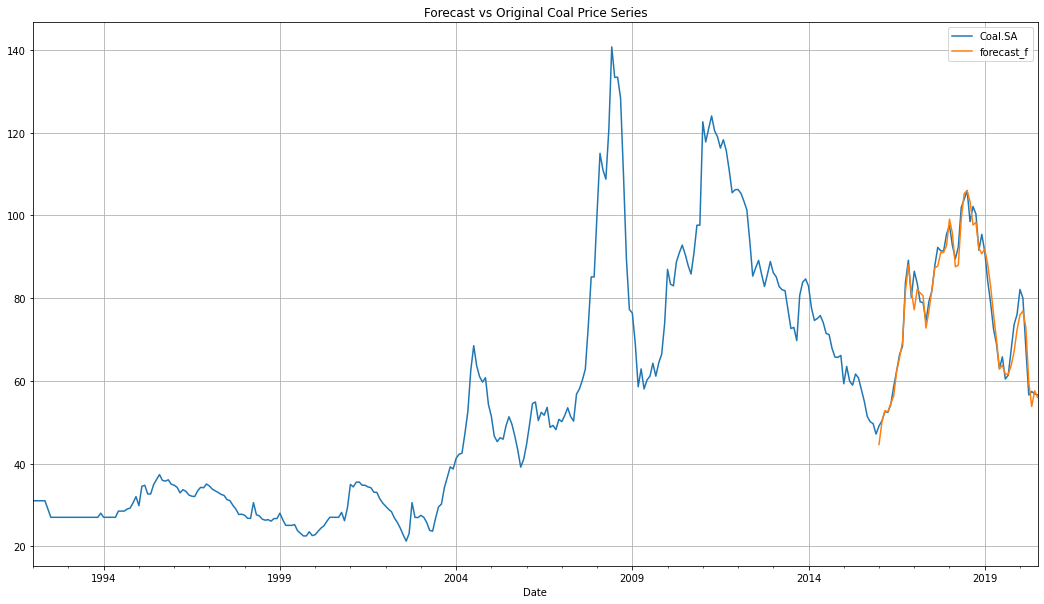

In [108]:
mpl.rcParams['axes.grid'] = True ## Set true for getting grid lines
df[['Coal.SA','forecast_f']].plot();
plt.title("Forecast vs Original Coal Price Series");

Final Model did a pretty fine job in forecasting the prices with an impressive error rates. 

# LSTM Model

In [109]:
# importing libraries
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler

from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense, Dropout
from tensorflow.keras.callbacks import EarlyStopping
from tensorflow.keras import layers
from tensorflow.keras import activations

#import talos

import matplotlib as mpl

mpl.rcParams['figure.figsize'] = (10,8)
mpl.rcParams['axes.grid'] = True

In [110]:
# rearranging dataframe columns to have target column at the first column for easy preprocessing
df = df[['Coal.SA','Coal.Australia', 'Fuel.Index', 'Coal.Producer.Index',
       'IronOre', 'CrudeOil.Index', 'Metal.Index', 'NonFuel.Index',
       'Commodity.Index', 'CCI']]

In [111]:
# checking first 5 rows of dataframe
df.head()

Coal.SA  Coal.Australia  Fuel.Index  Coal.Producer.Index  IronOre  \
Date                                                                            
1992-01-01     31.0            39.5       23.71                 93.6     33.1   
1992-02-01     31.0            39.5       23.83                 93.8     33.1   
1992-03-01     31.0            39.5       23.79                 93.6     33.1   
1992-04-01     31.0            39.5       25.24                 94.1     33.1   
1992-05-01     31.0            39.5       26.33                 94.7     33.1   

            CrudeOil.Index  Metal.Index  NonFuel.Index  Commodity.Index  \
Date                                                                      
1992-01-01           40.23        35.59          48.40            50.72   
1992-02-01           41.09        37.12          48.71            50.72   
1992-03-01           41.17        37.41          48.74            50.75   
1992-04-01           44.09        38.00          48.45            51.17   
1992-05-01           45.57        37.99          48.57            52.64   

                 CCI  
Date                  
1992-01-01  99.36520  
1992-02-01  99.46713  
1992-03-01  99.62660  
1992-04-01  99.72688  
1992-05-01  99.75301

## Changing the timeseries data into supervised learning data (X,y) by shifting the dataframe to have target variable at time t with all the features until time t-1

In [112]:
#converting series to supervised learning dataset
def series_to_supervised(data, n_in=1, n_out=1, dropnan=True):
	n_vars = 1 if type(data) is list else data.shape[1]
	df = pd.DataFrame(data)
	cols, names = list(), list()
	# input sequence (t-n, ... t-1)
	for i in range(n_in, 0, -1):
		cols.append(df.shift(i))
		names += [('var%d(t-%d)' % (j+1, i)) for j in range(n_vars)]
	# forecast sequence (t, t+1, ... t+n)
	for i in range(0, n_out):
		cols.append(df.shift(-i))
		if i == 0:
			names += [('var%d(t)' % (j+1)) for j in range(n_vars)]
		else:
			names += [('var%d(t+%d)' % (j+1, i)) for j in range(n_vars)]
	# put it all together
	agg = pd.concat(cols, axis=1)
	agg.columns = names
	# drop rows with NaN values
	if dropnan:
		agg.dropna(inplace=True)
	return agg

In [113]:
# storing row values as array
values = df.values
df.dtypes

Coal.SA                float64
Coal.Australia         float64
Fuel.Index             float64
Coal.Producer.Index    float64
IronOre                float64
CrudeOil.Index         float64
Metal.Index            float64
NonFuel.Index          float64
Commodity.Index        float64
CCI                    float64
dtype: object

In [114]:
# Scaling full data using the MinMaxScaler, since all the column values are float
# Variables that are measured at different scales do not contribute equally to the model fitting & model learned function and might end up creating a bias. Thus, to deal with this  # potential problem, feature-wise normalization such as MinMax Scaling is usually used prior to model fitting
scaler = MinMaxScaler()
data_scaled = scaler.fit_transform(values)

# changing data to supervised data as described above
reframed_data = series_to_supervised(data_scaled, 1,1)

In [115]:
# checking head of supervised data
reframed_data.head()

var1(t-1)  var2(t-1)  var3(t-1)  var4(t-1)  var5(t-1)  var6(t-1)  \
1   0.081607   0.153923   0.047280   0.075458   0.039825   0.062623   
2   0.081607   0.153923   0.048043   0.076923   0.039825   0.066215   
3   0.081607   0.153923   0.047789   0.075458   0.039825   0.066550   
4   0.081607   0.153923   0.057016   0.079121   0.039825   0.078748   
5   0.081607   0.153923   0.063952   0.083516   0.039825   0.084931   

   var7(t-1)  var8(t-1)  var9(t-1)  var10(t-1)   var1(t)   var2(t)   var3(t)  \
1   0.066605   0.096039   0.050221    0.346732  0.081607  0.153923  0.048043   
2   0.082355   0.099537   0.050221    0.366707  0.081607  0.153923  0.047789   
3   0.085341   0.099876   0.050409    0.397960  0.081607  0.153923  0.057016   
4   0.091414   0.096603   0.053029    0.417612  0.081607  0.153923  0.063952   
5   0.091312   0.097957   0.062200    0.422733  0.064867  0.153923  0.072860   

    var4(t)   var5(t)   var6(t)   var7(t)   var8(t)   var9(t)  var10(t)  
1  0.076923  0.039825  0.066215  0.082355  0.099537  0.050221  0.366707  
2  0.075458  0.039825  0.066550  0.085341  0.099876  0.050409  0.397960  
3  0.079121  0.039825  0.078748  0.091414  0.096603  0.053029  0.417612  
4  0.083516  0.039825  0.084931  0.091312  0.097957  0.062200  0.422733  
5  0.081319  0.039825  0.094749  0.103099  0.099876  0.063510  0.410052

In [116]:
#only keep data till time t; t+1, t2, ...all till the end can be dropped, since we only need to predict the target variable at time t
reframed_data.drop(['var2(t)', 'var3(t)', 'var4(t)', 'var5(t)', 'var6(t)',
       'var7(t)', 'var8(t)', 'var9(t)', 'var10(t)'], axis=1, inplace=True)

In [117]:
# storing dataframe as array 
values = reframed_data.values

In [118]:
# splitting full data into 80% training and 20% testing datasets
training_split= int(0.8*values.shape[0])
train = values[:training_split, :]
test = values[training_split:, :]
train_X, train_y = train[:, :-1], train[:, -1]
test_X, test_y = test[:, :-1], test[:, -1]

# reshape input to be 3D [samples, timesteps, features] for inputs to LSTM models
train_X = train_X.reshape((train_X.shape[0], 1, train_X.shape[1]))
test_X = test_X.reshape((test_X.shape[0], 1, test_X.shape[1]))
print(train_X.shape, train_y.shape, test_X.shape, test_y.shape)

(273, 1, 10) (273,) (69, 1, 10) (69,)


## LSTM Training

In [137]:
# LSTM network design: We use a small 2-layered LSTM model with 1 dropout layer to start with
model = Sequential()
model.add(LSTM(128, input_shape=(train_X.shape[1], train_X.shape[2]), return_sequences=True))
model.add(layers.Activation(activations.relu))
model.add(Dropout(0.15))
model.add(LSTM(32, return_sequences = False))
model.add(Dense(1))
model.compile(loss='mse', optimizer='adam', metrics=['mae'])

# viewing model summary
model.summary()

Model: "sequential_4"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
lstm_6 (LSTM)                (None, 1, 128)            71168     
_________________________________________________________________
activation_3 (Activation)    (None, 1, 128)            0         
_________________________________________________________________
dropout_3 (Dropout)          (None, 1, 128)            0         
_________________________________________________________________
lstm_7 (LSTM)                (None, 32)                20608     
_________________________________________________________________
dense_3 (Dense)              (None, 1)                 33        
Total params: 91,809
Trainable params: 91,809
Non-trainable params: 0
_________________________________________________________________


In [138]:
# add callback
es = EarlyStopping(monitor='val_loss', patience=3, mode='min')
# fit network
history = model.fit(train_X, train_y, epochs=100, batch_size=72, validation_split=0.2, verbose=2, shuffle=False, callbacks = [es])

Train on 218 samples, validate on 55 samples
Epoch 1/100
218/218 - 6s - loss: 0.0620 - mae: 0.1649 - val_loss: 0.3244 - val_mae: 0.5537
Epoch 2/100
218/218 - 0s - loss: 0.0560 - mae: 0.1494 - val_loss: 0.2953 - val_mae: 0.5270
Epoch 3/100
218/218 - 0s - loss: 0.0497 - mae: 0.1351 - val_loss: 0.2640 - val_mae: 0.4968
Epoch 4/100
218/218 - 0s - loss: 0.0437 - mae: 0.1214 - val_loss: 0.2302 - val_mae: 0.4619
Epoch 5/100
218/218 - 0s - loss: 0.0373 - mae: 0.1103 - val_loss: 0.1932 - val_mae: 0.4206
Epoch 6/100
218/218 - 0s - loss: 0.0312 - mae: 0.1012 - val_loss: 0.1540 - val_mae: 0.3720
Epoch 7/100
218/218 - 0s - loss: 0.0256 - mae: 0.0935 - val_loss: 0.1143 - val_mae: 0.3156
Epoch 8/100
218/218 - 0s - loss: 0.0202 - mae: 0.0890 - val_loss: 0.0768 - val_mae: 0.2514
Epoch 9/100
218/218 - 0s - loss: 0.0160 - mae: 0.0867 - val_loss: 0.0450 - val_mae: 0.1805
Epoch 10/100
218/218 - 0s - loss: 0.0138 - mae: 0.0927 - val_loss: 0.0227 - val_mae: 0.1179
Epoch 11/100
218/218 - 0s - loss: 0.0135 - m

## Making predictions on the train data

In [139]:
# prediction on the test data
yhat = model.predict(test_X)

In [140]:
# reversing the scaling for original and predicted values so that we can compare values normally as coal prices
test_X_reshape = test_X.reshape((test_X.shape[0], test_X.shape[2]))

# invert scaling for forecasted values
inv_yhat = np.concatenate((yhat, test_X_reshape[:, 1:]), axis=1)
inv_yhat = scaler.inverse_transform(inv_yhat)
inv_yhat = inv_yhat[:,0]

# invert scaling for actual values
test_y_reshape = test_y.reshape((len(test_y), 1))
inv_y = np.concatenate((test_y_reshape, test_X_reshape[:, 1:]), axis=1)
inv_y = scaler.inverse_transform(inv_y)
inv_y = inv_y[:,0]

## Checking performance of the model on actual v/s predicted values

In [141]:
# calculate RMSE

rmse = np.sqrt(mean_squared_error(inv_y, inv_yhat))
print('Test RMSE: %.3f' % rmse)

Test RMSE: 12.675


In [142]:
import sklearn.metrics as sm
print("R^2 score =", round(sm.r2_score(inv_y, inv_yhat), 2))

R^2 score = 0.41


### Plotting actual v/s predicted values for last 20% of the data selected for testing

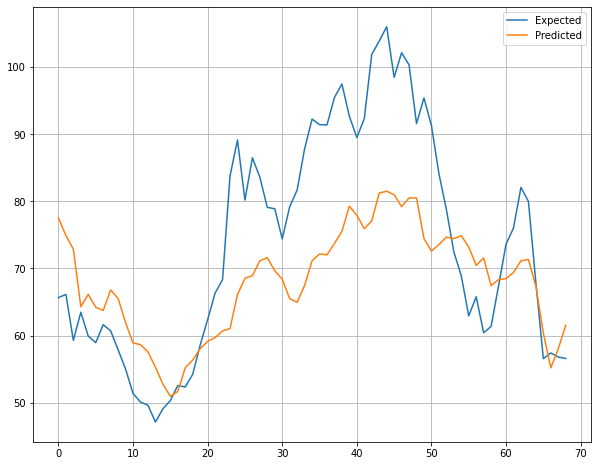

In [143]:
plt.plot(inv_y, label='Expected')
plt.plot(inv_yhat, label='Predicted')
plt.legend()
plt.show()

In [126]:
# As we see, the model is not yet good at predicting the values of coal prices form the first assigned hyperparameter values. We will now use hyperparameter search to try and fine-tune our model

## Using Talos for Hyperparameter tuning

In [144]:
# make function to use in talos
def lstm_model(train_X, train_y, val_X, val_y, params ):
    model = Sequential()
    model.add(LSTM(params['layer1_size'], input_shape=(train_X.shape[1], train_X.shape[2]), return_sequences = True))
    model.add(layers.Activation(activations.relu))
    model.add(Dropout(params['dropout']))
    model.add(LSTM(params['layer2_size'], return_sequences = False))
    model.add(Dense(1))
    model.compile(loss='mse', optimizer=params['optimizer'], metrics=['mae'])
    es = EarlyStopping(monitor='val_loss', patience=2, mode='min')
    # fit network
    out = model.fit(train_X, train_y, epochs=params['epochs'], batch_size=params['batch_size'], validation_split=0.2, verbose=2, shuffle=False, callbacks=[es])
    # plot history
    return out, model
    

#### Creating params grid for hyperparameters

In [145]:
p = {
     'optimizer': ['AdaDelta', 'adam'],
     'layer1_size': [32, 64, 128, 256],
     'layer2_size': [64,128],
     'batch_size': [32,64],
     'dropout':[0, 0.1,0.15],
     'epochs': [50,100,150,200]}

In [146]:
# Commenting this cell for parameter search, since this runs for a long time. Instead, we are adding the csv file that contains the result of all parameter combinations passed using # the parameter dictionary

# scan_object = talos.Scan(x=train_X,
#                          y=train_y,
#                          params=p,
#                          model=lstm_model, experiment_name = 'LSTM')

In [147]:
# importing csv from LSTM experiment
talos_data = pd.read_csv("LSTM/053021145649.csv")
talos_data.head()

round_epochs      loss       mae  val_loss   val_mae  batch_size  dropout  \
0            50  0.095572  0.223410  0.053073  0.149307          32      0.0   
1            50  0.001095  0.022630  0.001103  0.024132          32      0.0   
2            50  0.096573  0.227674  0.054239  0.154493          32      0.0   
3             7  0.016087  0.109848  0.016810  0.124817          32      0.0   
4            50  0.097894  0.231363  0.055289  0.158553          32      0.0   

   epochs  layer1_size  layer2_size optimizer  
0      50           32           64  AdaDelta  
1      50           32           64      adam  
2      50           32          128  AdaDelta  
3      50           32          128      adam  
4      50           64           64  AdaDelta

In [148]:
# this block is commented since we had already saved the model during the first talos iteration, and we are only loading it from the local machine for testing

# # selecting the best model from all possible models using MAE score from validation data
# best_model = scan_object.best_model(metric='val_mae', asc=True)

# # saving best model and model weights
# best_model.save('timeseries.h5')  
# best_model.save_weights('timeseries_weights.h5')

In [149]:
# loading best model and its weights
from tensorflow.keras.models import load_model
best_model = load_model('timeseries.h5')
best_model.load_weights('timeseries_weights.h5')

# summary of the best model
best_model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
lstm (LSTM)                  (None, 1, 256)            273408    
_________________________________________________________________
activation (Activation)      (None, 1, 256)            0         
_________________________________________________________________
lstm_1 (LSTM)                (None, 64)                82176     
_________________________________________________________________
dense (Dense)                (None, 1)                 65        
Total params: 355,649
Trainable params: 355,649
Non-trainable params: 0
_________________________________________________________________


### Making predictions with the best model on the original test data

In [150]:
# predictions on test data
yhat_best = best_model.predict(test_X)
test_X_reshape = test_X.reshape((test_X.shape[0], test_X.shape[2]))

# invert scaling for forecast
inv_yhat = np.concatenate((yhat_best, test_X_reshape[:, 1:]), axis=1)
inv_yhat = scaler.inverse_transform(inv_yhat)
inv_yhat = inv_yhat[:,0]

# invert scaling for actual
test_y_reshape = test_y.reshape((len(test_y), 1))
inv_y = np.concatenate((test_y_reshape, test_X_reshape[:, 1:]), axis=1)
inv_y = scaler.inverse_transform(inv_y)
inv_y = inv_y[:,0]

### Checking best model performance

In [151]:
# calculate RMSE
rmse = np.sqrt(mean_squared_error(inv_y, inv_yhat))
print('Test RMSE: %.3f' % rmse)

Test RMSE: 10.391


In [152]:
import sklearn.metrics as sm
print("R^2 score =", round(sm.r2_score(inv_y, inv_yhat), 2))

R^2 score = 0.61


## Plotting original v/s predicted data from the best model

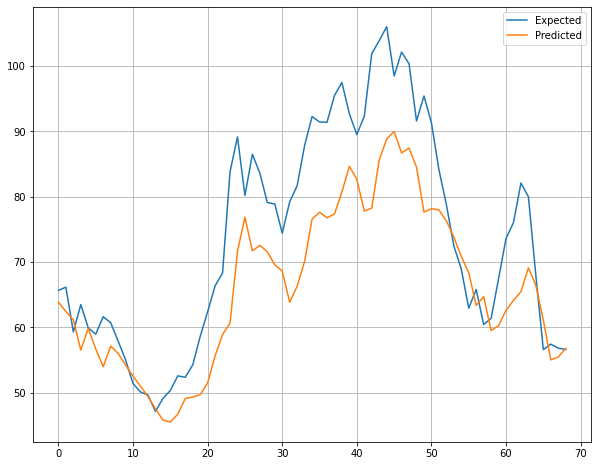

In [153]:
plt.plot(inv_y, label='Expected')
plt.plot(inv_yhat, label='Predicted')
plt.legend()
plt.show()

# Conclusion

In this project, we analysed the timeseries for the forecasting of Coal prices in South Africa. We did extensive 'Exploratory Data Analysis' with the help of which we performed data cleaning, processing along with feature selection and extraction. We checked the timeseries for stationarity and seasonality using both graphical and mathematical models. We handled outliers in some years. We believe the reason for the outliers is the economic crisis in 2008. There was a sharp slowdown in demand, and with mining output remaining stubbornly high. Therefore, coal benchmarks fell down.

We trained Classical timeseries forecasting method: ARIMA (Auto Regressive Integrated Moving Average), and a Deep Learning method using LSTM along with extensive hyperparameter search using TALOS library.

We calculate the metric R^2 (coefficient of determination) regression score function. The R^2 score obtained using ARIMA is 0.96 in comparison to 0.61 which is achieved by LSTM model. For this, not very complex, timeseries ARIMA outperforms the LSTM model as we are trying an overly complex Deep Learning method to fit on a simple timeseries data.